# Imports

In [ ]:
import pandas as pd
import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

from scipy import stats
from statsmodels import robust


from google.colab import files

from sklearn.preprocessing import PolynomialFeatures

from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import *

from matplotlib import rc

from sklearn.cluster import KMeans

from sklearn import svm

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/master.csv')

# **HW_2**

-Очистити датасет від викидів, рядків, що не містять значень. \
-Порахувати середнє, усічене середнє, медіану, дисперсією, стандартне  відхилення, середнє відхидення, абсолютно медіане відхилення. \
-Нормалізувати дані мін. мах та середня нормалізація. \
-Намалювати 3 графіки. \

Всі маніпуляції проводити над стовбцем з числовим значенням. \
Прикріпити очищений дата сет. \
Пораховані значення записати в окремий файл.\
Прикріпити файл з нормалізованими даними.\
Графіки можна прикріплювали картинками

# -Очистити датасет від викидів, рядків, що не містять значень.

In [ ]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gpy,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [ ]:
df = df.drop(columns=" gpy")

In [ ]:
df = df.rename(columns={'suicides/100k pop': 'suicides_100k_pop', 'country-year': 'country_year', 'HDI for year': 'HDI_for_year', 'gdp_per_capita ': 'gdp_per_capita'})

In [ ]:
df.shape

(27820, 11)

In [ ]:
df.head()

,country,year,sex,age,suicides_no,population,suicides_100k_pop,country_year,HDI_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,796,Boomers


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            27820 non-null  object 
 1   year               27820 non-null  int64  
 2   sex                27820 non-null  object 
 3   age                27820 non-null  object 
 4   suicides_no        27820 non-null  int64  
 5   population         27820 non-null  int64  
 6   suicides_100k_pop  27820 non-null  float64
 7   country_year       27820 non-null  object 
 8   HDI_for_year       8364 non-null   float64
 9   gdp_per_capita     27820 non-null  int64  
 10  generation         27820 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 2.3+ MB


In [ ]:
df.nunique()

country                101
year                    32
sex                      2
age                      6
suicides_no           2084
population           25564
suicides_100k_pop     5298
country_year          2321
HDI_for_year           305
gdp_per_capita        2233
generation               6
dtype: int64

In [ ]:
df.population.min()

278

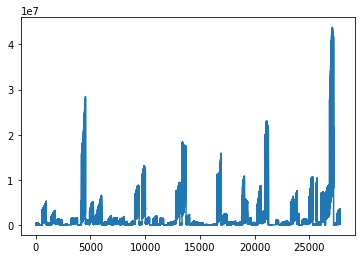

In [ ]:
df.population.plot()

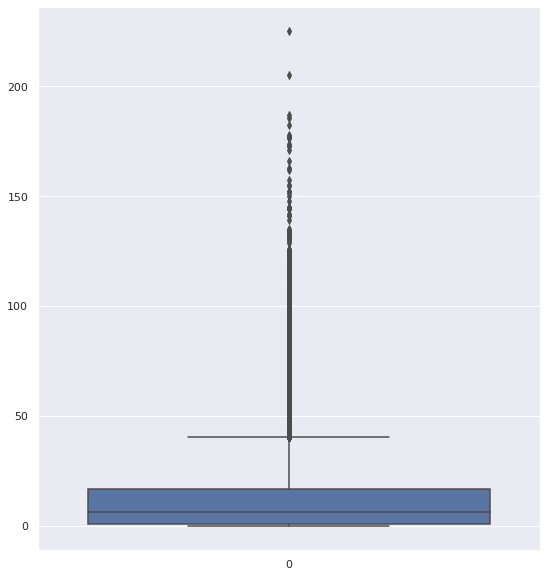

In [ ]:
sns.set(rc={'figure.figsize':(9,10)})

sns.boxplot(data=df.suicides_100k_pop)

In [ ]:
df.query('suicides_100k_pop > 200')

,country,year,sex,age,suicides_no,population,suicides_100k_pop,country_year,HDI_for_year,gdp_per_capita,generation
1258,Aruba,1995,male,75+ years,2,889,224.97,Aruba1995,NaN,17949,G.I. Generation
22280,Seychelles,2006,male,75+ years,2,976,204.92,Seychelles2006,NaN,12442,Silent


Удалим два выброса


In [ ]:
df = df.drop(labels=[1258,22280], axis=0)

In [ ]:
df.query('suicides_100k_pop > 200')

,country,year,sex,age,suicides_no,population,suicides_100k_pop,country_year,HDI_for_year,gdp_per_capita,generation


In [ ]:
df.HDI_for_year.value_counts()

0.772    84
0.713    84
0.888    84
0.830    72
0.761    72
         ..
0.696    12
0.894    12
0.893    12
0.770    12
0.675    12
Name: HDI_for_year, Length: 305, dtype: int64

Посоветоваться как быть с индексом человеческого развития(треть пропущена)

In [ ]:
df = df.drop(columns=["HDI_for_year", 'generation', 'country_year'])

In [ ]:
df.describe()

,year,suicides_no,population,suicides_100k_pop,gdp_per_capita
count,27818.000000,27818.000000,2.781800e+04,27818.000000,27818.000000
mean,2001.258430,242.591703,1.844926e+06,12.801565,16866.584550
std,8.469229,902.078038,3.911889e+06,18.884380,18888.235709
min,1985.000000,0.000000,2.780000e+02,0.000000,251.000000
25%,1995.000000,3.000000,9.752175e+04,0.920000,3447.000000
50%,2002.000000,25.000000,4.302290e+05,5.990000,9372.000000
75%,2008.000000,131.000000,1.486248e+06,16.610000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,187.060000,126352.000000


In [ ]:
df['suicides_100k_pop'].agg(['min', 'max'])

min      0.00
max    187.06
Name: suicides_100k_pop, dtype: float64

In [ ]:
df.groupby(['age', 'sex']).agg({'population': 'mean'})

population
age         sex                 
15-24 years female  1.829022e+06
            male    1.894781e+06
25-34 years female  1.805482e+06
            male    1.830065e+06
35-54 years female  3.130923e+06
            male    3.062911e+06
5-14 years  female  1.782186e+06
            male    1.861499e+06
55-74 years female  2.049436e+06
            male    1.743432e+06
75+ years   female  7.348334e+05
            male    4.129931e+05

#Візьміть 1-2% верхньої межі (для suicides_100k_pop). Просортуйте і відсічіть. Сильно не погіршить але може покращить.

In [ ]:
suicides_sorted = df.suicides_100k_pop.sort_values()

In [ ]:
len_suicides_100k_pop = len(df.suicides_100k_pop)

In [ ]:
len_suicides_100k_pop

27818

Наши 1,5 процента данных верхней границы

In [ ]:
suicides_sorted[int(len_suicides_100k_pop*0.985): len_suicides_100k_pop]

11449     83.79
21106     83.80
26224     83.81
26200     83.84
14841     83.86
          ...  
11388    177.57
11376    177.61
20530    182.32
20542    185.37
24332    187.06
Name: suicides_100k_pop, Length: 418, dtype: float64

In [ ]:
lst_index = suicides_sorted[int(len_suicides_100k_pop*0.985): len_suicides_100k_pop].index

Удалим знач с датасета по этим индексам

In [ ]:
df_98_percent = df.drop(labels=lst_index, axis=0)

In [ ]:
df = df_98_percent.copy()

In [ ]:
df_98_percent

,country,year,sex,age,suicides_no,population,suicides_100k_pop,gdp_per_capita
0,Albania,1987,male,15-24 years,21,312900,6.71,796
1,Albania,1987,male,35-54 years,16,308000,5.19,796
2,Albania,1987,female,15-24 years,14,289700,4.83,796
3,Albania,1987,male,75+ years,1,21800,4.59,796
4,Albania,1987,male,25-34 years,9,274300,3.28,796
...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,2309
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,2309
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,2309
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,2309


/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


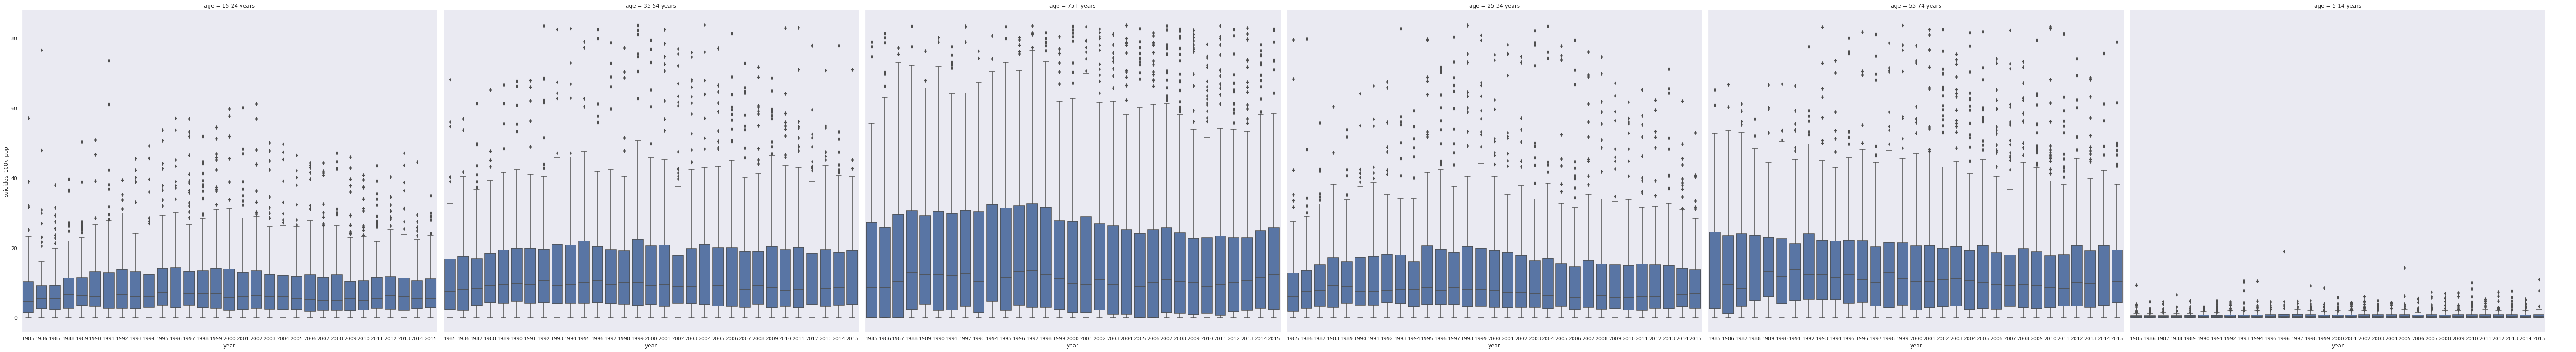

In [ ]:
g = sns.FacetGrid(df_98_percent, col="age", height=11, aspect=1.2)
g.map(sns.boxplot, "year", "suicides_100k_pop")
g.add_legend()

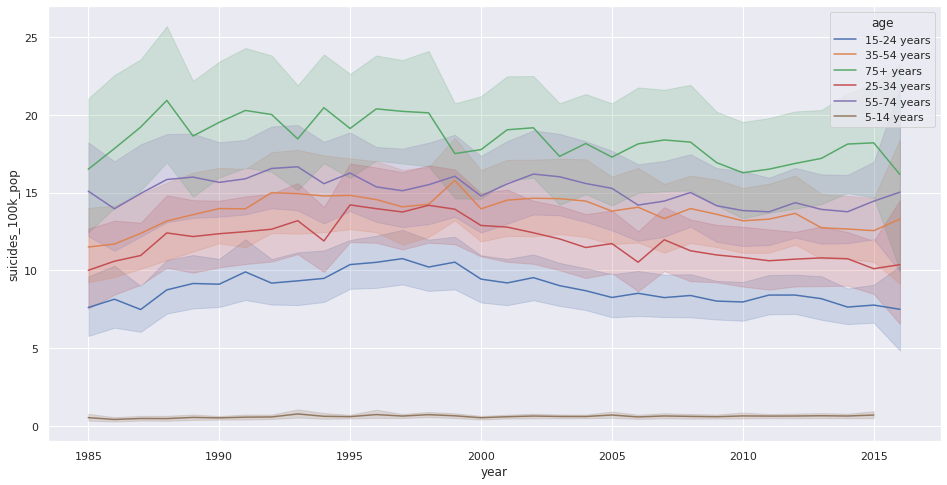

In [ ]:
sns.set(rc={'figure.figsize':(16,8)})


# Plot the responses for different events and regions
sns.lineplot(x="year", y="suicides_100k_pop",
             hue="age", 
             data=df_98_percent)

In [ ]:
#df_98_percent.to_csv('clean_data.csv')
#files.download('clean_data.csv')

In [ ]:
df.query('age == "15-24 years"').describe()

,year,suicides_no,population,suicides_100k_pop,gdp_per_capita
count,4641.000000,4641.000000,4.641000e+03,4641.000000,4641.000000
mean,2001.278819,173.908640,1.861942e+06,8.930640,16880.117001
std,8.477216,521.325767,3.505209e+06,9.512789,18894.907584
min,1985.000000,0.000000,1.325000e+03,0.000000,251.000000
25%,1995.000000,6.000000,1.663000e+05,2.410000,3450.000000
50%,2002.000000,33.000000,4.989900e+05,5.910000,9378.000000
75%,2008.000000,119.000000,1.792565e+06,12.360000,24874.000000
max,2016.000000,6945.000000,2.273563e+07,76.600000,126352.000000


In [ ]:
df.query('age == "75+ years"').describe()

,year,suicides_no,population,suicides_100k_pop,gdp_per_capita
count,4353.000000,4353.000000,4.353000e+03,4353.000000,4353.000000
mean,2001.418102,128.084539,5.907148e+05,18.373267,17163.749368
std,8.513034,355.240888,1.358721e+06,20.873921,19229.668462
min,1985.000000,0.000000,2.780000e+02,0.000000,251.000000
25%,1995.000000,1.000000,2.059200e+04,1.690000,3485.000000
50%,2002.000000,15.000000,1.242500e+05,10.910000,9479.000000
75%,2009.000000,78.000000,4.556270e+05,27.670000,25234.000000
max,2016.000000,3171.000000,1.177867e+07,83.710000,126352.000000


Выше смотрел на данные и удалил один столбец(gpy) и две строки(выбросы). \
Дальше задачи буду выполнять с колонкой suicides_100k_pop так как она более содержательна и явнее показывает зависимость

# -Порахувати середнє, усічене середнє, медіану, дисперсією, стандартне відхилення, середнє відхидення, абсолютно медіане відхилення.

Среднее, медиана

In [ ]:
df.suicides_100k_pop.describe()

count    27400.000000
mean        11.407138
std         15.035127
min          0.000000
25%          0.880000
50%          5.770000
75%         15.830000
max         83.790000
Name: suicides_100k_pop, dtype: float64

mean      12.801565\
median    5.990000


Рассчитаем усеченное среднее по 5 процентам колонки suicides_100k_pop

In [ ]:
stats.trim_mean(df.suicides_100k_pop, 0.05).round(2)

9.37

Дисперсия : Это Среднее квадратное отклонение элементов списка от среднего значения.

In [ ]:
df['suicides_100k_pop'].var().round(2)

226.06

Стандартное отклонение – это статистическая единица, которая представляет собой вариацию данных, то есть отображает отклонение значений данных от центрального значения (среднего значения данных).

In [ ]:
df['suicides_100k_pop'].std().round(2)

15.04

Среднее отлонение\
MAD = медиана (|$x_i$ – $x_m$ |)\
Return the mean absolute deviation of the values over the requested axis.



\\
$x_i$ : i-е значение в наборе данных\
$x_m$ : среднее значение в наборе данных\

\\
Важно отметить, что формула, используемая для расчета MAD, вычисляет надежную оценку стандартного отклонения при условии нормального распределения путем масштабирования результата с коэффициентом примерно 0,67.



In [ ]:
df[['suicides_100k_pop']].apply(robust.mad)

suicides_100k_pop    8.317398
dtype: float64

Aбсолютно медіане відхилення

In [ ]:
def myMAD(x):
    med = np.median(x)
    x   = abs(x-med)
    MAD = np.median(x)
    return MAD


In [ ]:
df['suicides_100k_pop'].apply(myMAD)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
27815    0.0
27816    0.0
27817    0.0
27818    0.0
27819    0.0
Name: suicides_100k_pop, Length: 27400, dtype: float64

# -Нормалізувати дані мін. мах та середня нормалізація.

In [ ]:
data = df.suicides_100k_pop

## Мин-макс нормализация
\
Цель: Преобразует каждое значение данных в значение от 0 до 1.
\
Формула: Новое значение = (значение – мин.) / (макс. – мин.)

In [ ]:
min_max_norm = (data - data.min()) / (data.max() - data.min())

In [ ]:
min_max_norm

0        0.080081
1        0.061941
2        0.057644
3        0.054780
4        0.039145
           ...   
27815    0.035326
27816    0.030791
27817    0.025898
27818    0.019931
27819    0.017425
Name: suicides_100k_pop, Length: 27400, dtype: float64

In [ ]:
keys = min_max_norm.index

In [ ]:
values = min_max_norm.values

In [ ]:
frame = {'index': keys, 'min_max_norm_suicides_100k_pop': values}

In [ ]:
result = pd.DataFrame(frame)

In [ ]:
result

,index,min_max_norm_suicides_100k_pop
0,0,0.080081
1,1,0.061941
2,2,0.057644
3,3,0.054780
4,4,0.039145
...,...,...
27395,27815,0.035326
27396,27816,0.030791
27397,27817,0.025898
27398,27818,0.019931


In [ ]:
df.suicides_100k_pop.idxmax()

21117

Скачаем

In [ ]:
#result.to_csv('min_max_norm.csv')
#files.download('min_max_norm.csv')

## Нормализация среднего
\
Значения в каждом столбце теперь нормализованы таким образом, что среднее значение значений в каждом столбце равно 0, а стандартное отклонение значений в каждом столбце равно 1.

\\
Если конкретная точка данных имеет нормализованное значение больше 0, это указывает на то, что точка данных больше, чем среднее значение ее столбца. 
\
И наоборот, нормализованное значение меньше 0 указывает на то, что точка данных меньше среднего значения столбца.

In [ ]:
mean_norm = (data - data.mean()) / data.std()

In [ ]:
index1 = mean_norm.index

In [ ]:
values1 = mean_norm.values

In [ ]:
frame1 = {'index': index1, 'mean_norm_suicides_100k_pop': values1}

In [ ]:
result1 = pd.DataFrame(frame1)

In [ ]:
result1

,index,mean_norm_suicides_100k_pop
0,0,-0.312411
1,1,-0.413508
2,2,-0.437451
3,3,-0.453414
4,4,-0.540543
...,...,...
27395,27815,-0.561827
27396,27816,-0.587101
27397,27817,-0.614371
27398,27818,-0.647626


Скачаем 

In [ ]:
#result1.to_csv('mean_norm.csv')
#files.download('mean_norm.csv')

# -Намалювати 3 графіки.

In [ ]:
df.head()

,country,year,sex,age,suicides_no,population,suicides_100k_pop,gdp_per_capita
0,Albania,1987,male,15-24 years,21,312900,6.71,796
1,Albania,1987,male,35-54 years,16,308000,5.19,796
2,Albania,1987,female,15-24 years,14,289700,4.83,796
3,Albania,1987,male,75+ years,1,21800,4.59,796
4,Albania,1987,male,25-34 years,9,274300,3.28,796


In [ ]:
df.age.unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [ ]:
t = df.groupby('year', as_index=False).agg({'suicides_100k_pop': 'mean'})

In [ ]:
t

,year,suicides_100k_pop
0,1985,10.124947
1,1986,10.366053
2,1987,10.847916
3,1988,11.854134
4,1989,11.584537
5,1990,11.767866
6,1991,12.079406
7,1992,12.243779
8,1993,12.124582
9,1994,11.993822


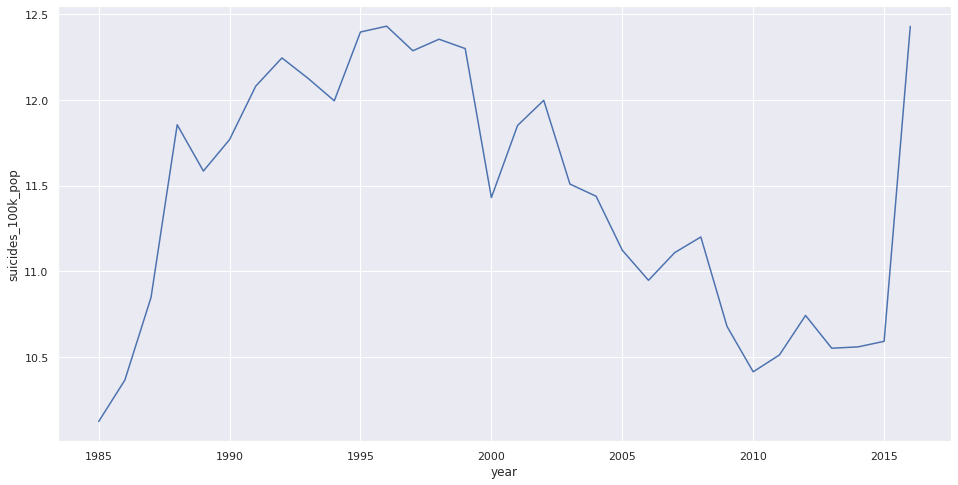

In [ ]:
sns.lineplot(x="year", y='suicides_100k_pop',
             data=t)

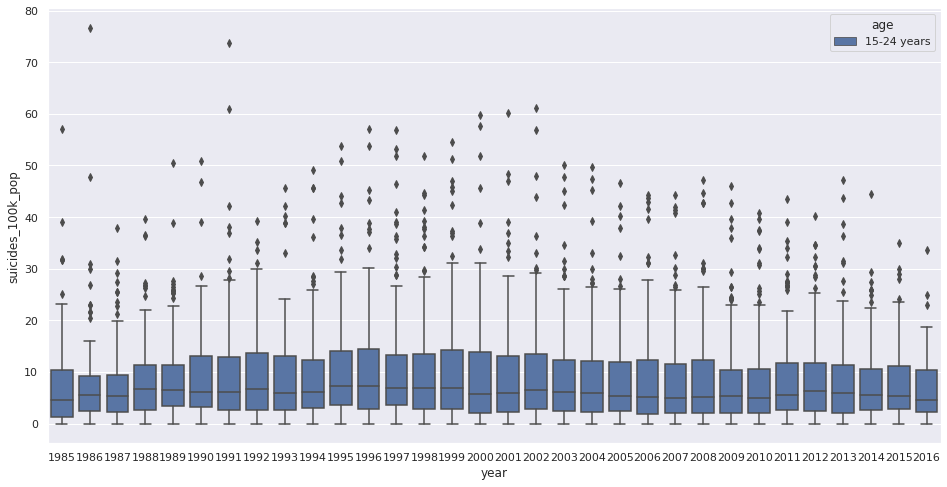

In [ ]:
sns.set(rc={'figure.figsize':(16,8)})

 
sns.boxplot(x="year", y="suicides_100k_pop",
            hue="age",
            data=df.query('age == "15-24 years"'))



/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


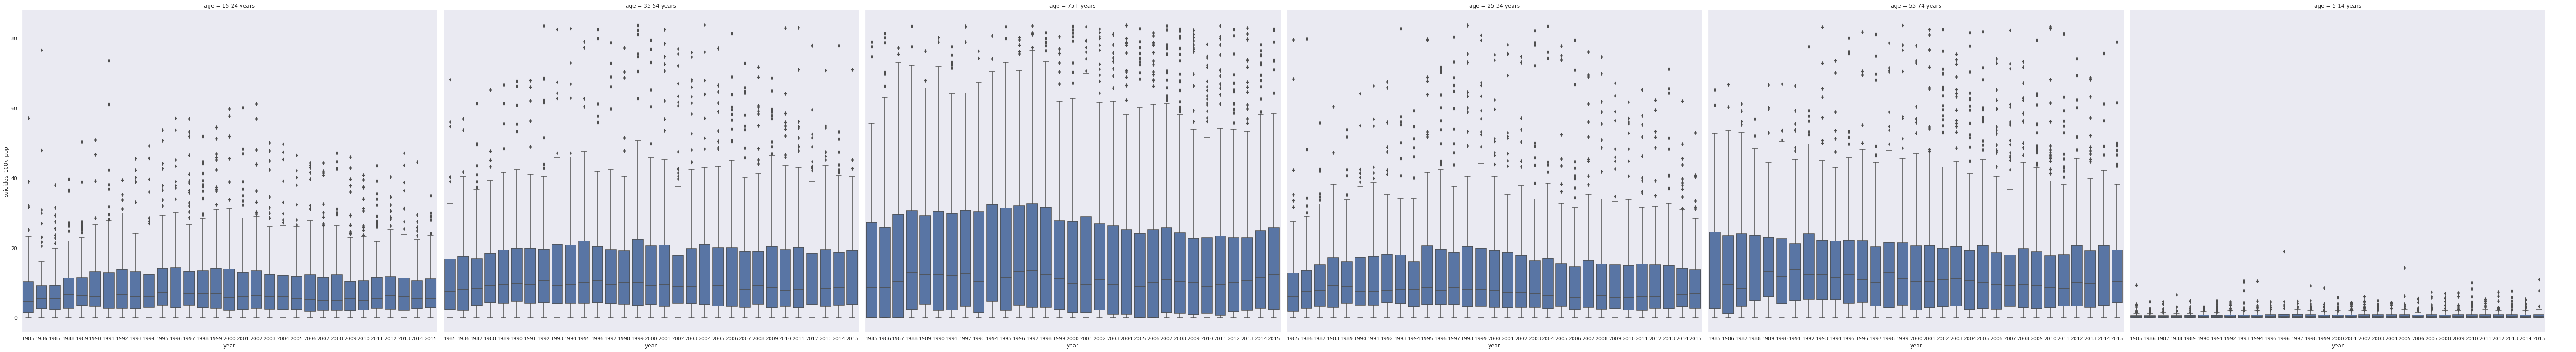

In [ ]:
#sns.set(rc={'figure.figsize':(25,8)})
#mpl.rc("figure", figsize=(45, 10))


g = sns.FacetGrid(df, col="age", height=11, aspect=1.2)
g.map(sns.boxplot, "year", "suicides_100k_pop")
g.add_legend()

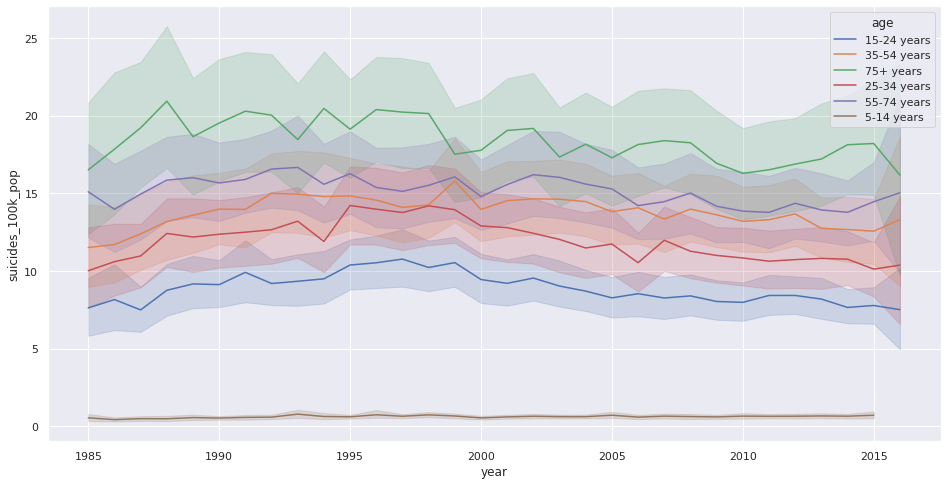

In [ ]:
sns.set(rc={'figure.figsize':(16,8)})


# Plot the responses for different events and regions
sns.lineplot(x="year", y="suicides_100k_pop",
             hue="age", 
             data=df)

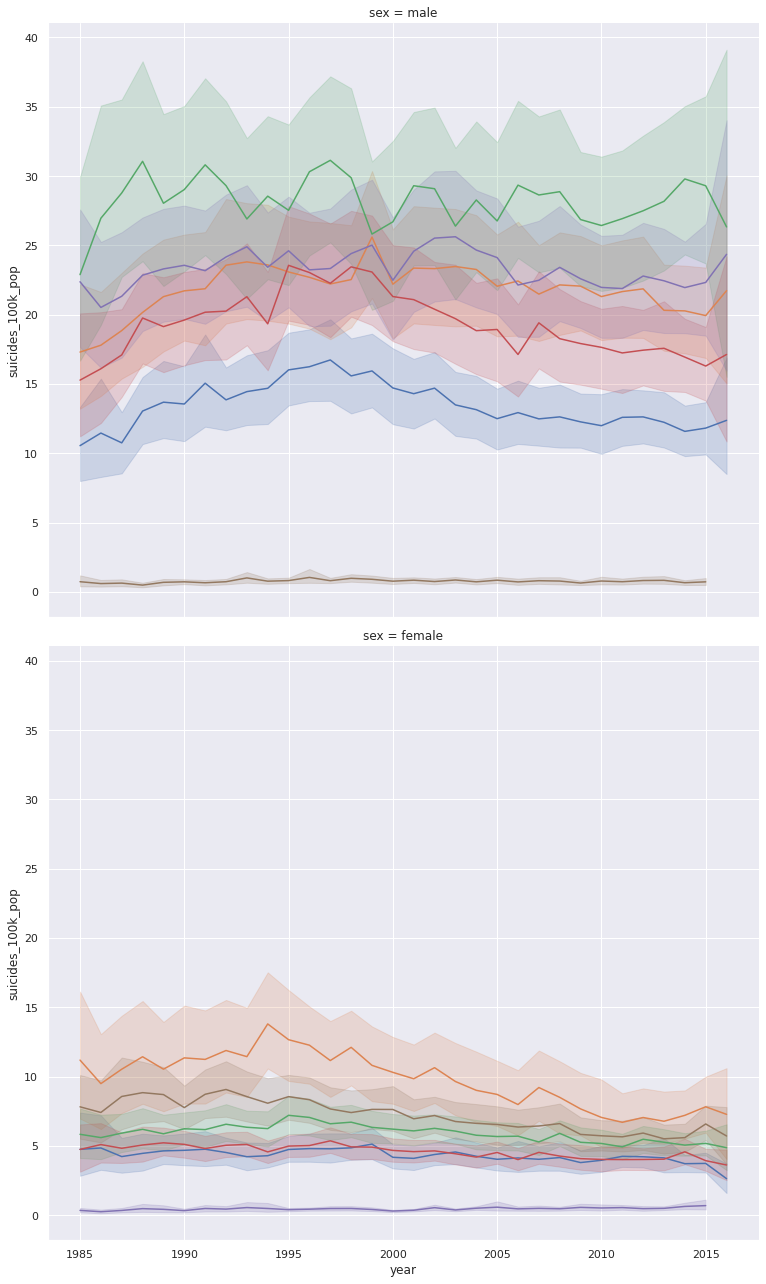

In [ ]:
g = sns.FacetGrid(df, row='sex', height=9, aspect=1.2)
g.map(sns.lineplot, "year", "suicides_100k_pop", 'age')

Так же можно попробовать нарисовать такое


И плюс в целом поглядь код для визуализации на каггле

https://www.kaggle.com/code/tavoosi/suicide-data-full-interactive-dashboard

# **HW_3**
Зробити кластерний аналіз
Метод к-середніх:
- Надати оптимальну кількість кластерів(Наприклад,метод ліктя. Якщо інший то напишіть який саме використовували. Намалювати графік, який відображає оптимальність кластерів);\
- Надати таблицю з цетрами кластерів та кількістю елементів;\
- Намалювати кластери різними кольорами на одній сітці та їх центри.\
Також вказуйте, яку метрику ви використовували для визначення радіусу кластера(евклідову, манхетенську тощо).

\
Ієрархічний метод:
- Намалювати дендограму;
- Визначити оптимальну кількість кластерів: якщо з візувалізації, по поясніть, чому саме така кількість кластерів;
- Надати таблицю з кількістю елементів по кластерам;
Порівняти кількіть та збалансованість кластерів в цих двох кластерних анаізів.

\
Оформити в бажано одним файлом.

In [ ]:
df[ df['sex']=='male' ].corr()

,year,suicides_no,population,suicides_100k_pop,gdp_per_capita
year,1.000000,0.011108,0.009984,-0.009474,0.339987
suicides_no,0.011108,1.000000,0.763977,0.300744,0.096395
population,0.009984,0.763977,1.000000,0.033077,0.086351
suicides_100k_pop,-0.009474,0.300744,0.033077,1.000000,0.037260
gdp_per_capita,0.339987,0.096395,0.086351,0.037260,1.000000


In [ ]:
df

,country,year,sex,age,suicides_no,population,suicides_100k_pop,gdp_per_capita
0,Albania,1987,male,15-24 years,21,312900,6.71,796
1,Albania,1987,male,35-54 years,16,308000,5.19,796
2,Albania,1987,female,15-24 years,14,289700,4.83,796
3,Albania,1987,male,75+ years,1,21800,4.59,796
4,Albania,1987,male,25-34 years,9,274300,3.28,796
...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,2309
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,2309
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,2309
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,2309


In [ ]:
df['suicides_cuts'] = pd.qcut(df['suicides_no'], 6)

In [ ]:
df.groupby('suicides_cuts')['suicides_no'].agg(['count', 'mean'])

,count,mean
suicides_cuts,,
"(-0.001, 1.0]",5815,0.263801
"(1.0, 6.0]",3658,3.564516
"(6.0, 23.0]",4243,13.763375
"(23.0, 74.0]",4590,44.839651
"(74.0, 240.0]",4537,136.264492
"(240.0, 17465.0]",4557,1161.495501


In [ ]:
df.groupby(['age', 'sex'], as_index=False).agg({'population': 'mean', 'suicides_no': 'mean', 'suicides_100k_pop': 'mean', 'gdp_per_capita': 'mean'})    

,age,sex,population,suicides_no,suicides_100k_pop,gdp_per_capita
0,15-24 years,female,1.829022e+06,75.586816,4.328018,16876.573460
1,15-24 years,male,1.894877e+06,272.272845,13.535246,16883.662069
2,25-34 years,female,1.805482e+06,89.971133,4.573210,16876.573460
3,25-34 years,male,1.812693e+06,371.844887,19.419294,16952.449307
4,35-54 years,female,3.130923e+06,218.109866,5.916480,16876.573460
5,35-54 years,male,3.024413e+06,744.409452,22.010905,17215.258392
6,5-14 years,female,1.782186e+06,7.373970,0.462252,16815.568330
7,5-14 years,male,1.861499e+06,15.300217,0.777831,16815.568330
8,55-74 years,female,2.049436e+06,185.280483,7.123447,16876.573460
9,55-74 years,male,1.721283e+06,479.598850,23.325414,17235.919062


### Розміри кластерів повинні бути збалансованими тож **оберемо близькі за кількістю категоріі**: чоловіки від 25 до 74 років, якщо дивитись за показником suicides_100k_pop

In [ ]:
df.age.value_counts()

15-24 years    4641
25-34 years    4629
5-14 years     4610
35-54 years    4585
55-74 years    4582
75+ years      4353
Name: age, dtype: int64

### Определим Х

In [ ]:
X = df[   ((df['age']=='25-34 years') | (df['age']=='35-54 years') | (df['age']=='55-74 years')) & (df['sex']=='male')   ]

In [ ]:
X.shape

(6833, 9)

In [ ]:
X = X.reset_index()

In [ ]:
X.groupby(['age', 'sex'], as_index=False).agg({'population': 'mean', 'suicides_no': 'mean', 'suicides_100k_pop': 'mean'})    

,age,sex,population,suicides_no,suicides_100k_pop
0,25-34 years,male,1.812693e+06,371.844887,19.419294
1,35-54 years,male,3.024413e+06,744.409452,22.010905
2,55-74 years,male,1.721283e+06,479.598850,23.325414


In [ ]:
X

,index,country,year,sex,age,suicides_no,population,suicides_100k_pop,gdp_per_capita,suicides_cuts
0,1,Albania,1987,male,35-54 years,16,308000,5.19,796,"(6.0, 23.0]"
1,4,Albania,1987,male,25-34 years,9,274300,3.28,796,"(6.0, 23.0]"
2,8,Albania,1987,male,55-74 years,1,137500,0.73,796,"(-0.001, 1.0]"
3,15,Albania,1988,male,35-54 years,14,314100,4.46,769,"(6.0, 23.0]"
4,16,Albania,1988,male,55-74 years,4,140200,2.85,769,"(1.0, 6.0]"
...,...,...,...,...,...,...,...,...,...,...
6828,27797,Uzbekistan,2013,male,25-34 years,328,2644648,12.40,2150,"(240.0, 17465.0]"
6829,27800,Uzbekistan,2013,male,55-74 years,119,1202790,9.89,2150,"(74.0, 240.0]"
6830,27808,Uzbekistan,2014,male,35-54 years,519,3421300,15.17,2309,"(240.0, 17465.0]"
6831,27809,Uzbekistan,2014,male,25-34 years,318,2739150,11.61,2309,"(240.0, 17465.0]"


In [ ]:
result1

,index,mean_norm_suicides_100k_pop
0,0,-0.312411
1,1,-0.413508
2,2,-0.437451
3,3,-0.453414
4,4,-0.540543
...,...,...
27395,27815,-0.561827
27396,27816,-0.587101
27397,27817,-0.614371
27398,27818,-0.647626


Добавим столбик с нормализацией suicides_100k_pop

In [ ]:
X = X.merge(result, how='left', on='index')

Сделаю нормализацию для suicides_no (потребовалось в методе к-средних)

In [ ]:
X['min_max_norm_suicides_no'] = (X.suicides_no - X.suicides_no.min()) / (X.suicides_no.max() - X.suicides_no.min())

In [ ]:
X            

,index,country,year,sex,age,suicides_no,population,suicides_100k_pop,gdp_per_capita,suicides_cuts,min_max_norm_suicides_100k_pop,min_max_norm_suicides_no
0,1,Albania,1987,male,35-54 years,16,308000,5.19,796,"(6.0, 23.0]",0.061941,0.000916
1,4,Albania,1987,male,25-34 years,9,274300,3.28,796,"(6.0, 23.0]",0.039145,0.000515
2,8,Albania,1987,male,55-74 years,1,137500,0.73,796,"(-0.001, 1.0]",0.008712,0.000057
3,15,Albania,1988,male,35-54 years,14,314100,4.46,769,"(6.0, 23.0]",0.053228,0.000802
4,16,Albania,1988,male,55-74 years,4,140200,2.85,769,"(1.0, 6.0]",0.034014,0.000229
...,...,...,...,...,...,...,...,...,...,...,...,...
6828,27797,Uzbekistan,2013,male,25-34 years,328,2644648,12.40,2150,"(240.0, 17465.0]",0.147989,0.018780
6829,27800,Uzbekistan,2013,male,55-74 years,119,1202790,9.89,2150,"(74.0, 240.0]",0.118033,0.006814
6830,27808,Uzbekistan,2014,male,35-54 years,519,3421300,15.17,2309,"(240.0, 17465.0]",0.181048,0.029717
6831,27809,Uzbekistan,2014,male,25-34 years,318,2739150,11.61,2309,"(240.0, 17465.0]",0.138561,0.018208


Не интересно

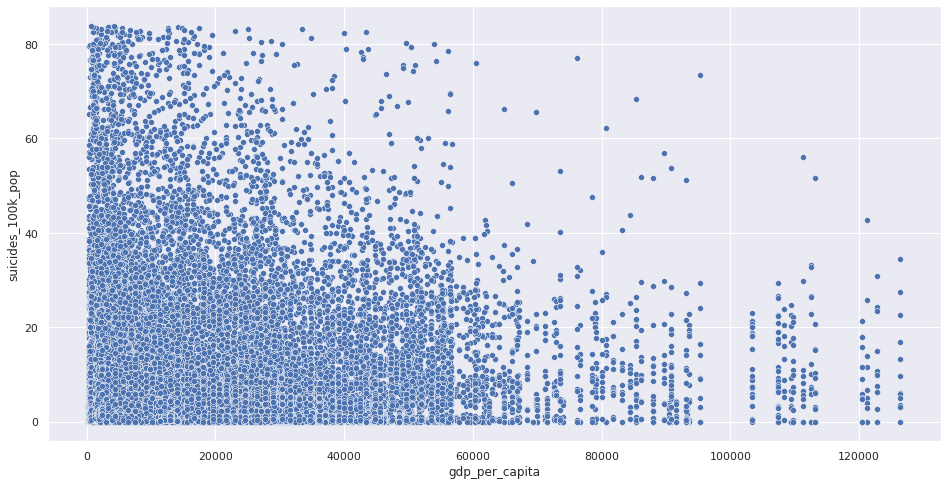

In [ ]:
sns.scatterplot(x="gdp_per_capita", y="suicides_100k_pop", 
                data=df)

Не интересно

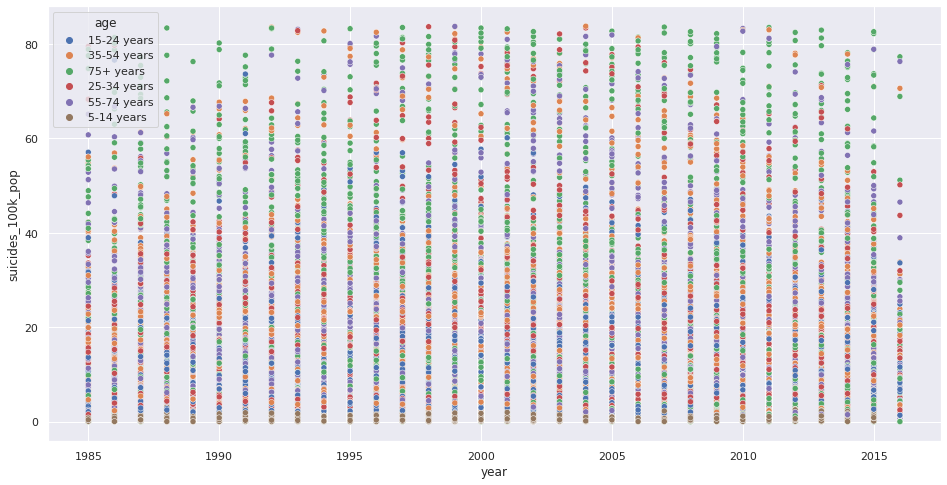

In [ ]:
sns.scatterplot(x="year", y="suicides_100k_pop",
                hue="age",
                data=df)

Не интересно

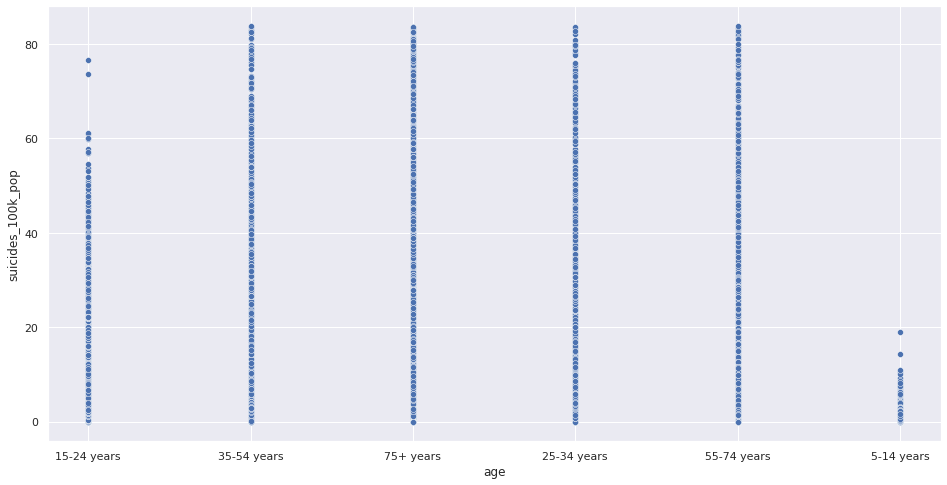

In [ ]:
sns.scatterplot(x="age", y="suicides_100k_pop",
                data=df)

тут решил сделать кукат для суицид_но но там дальше выходит двумерный массив

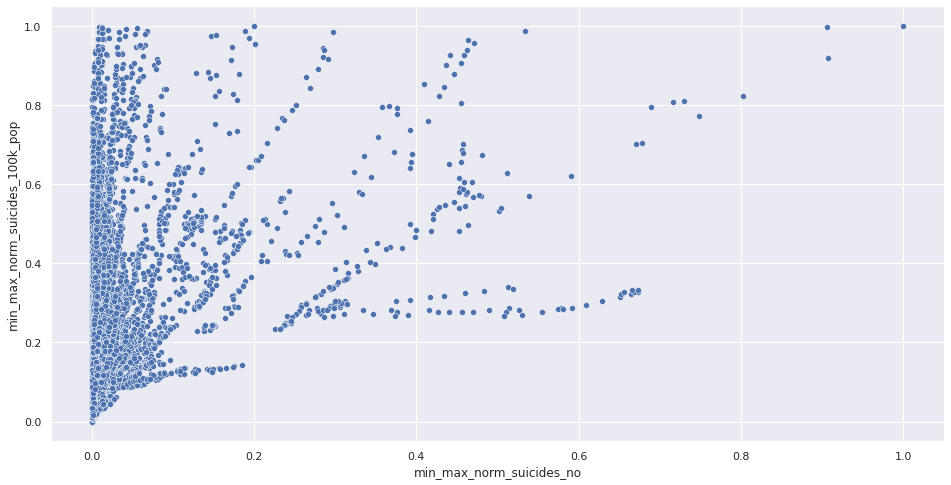

In [ ]:
sns.scatterplot(x="min_max_norm_suicides_no", y="min_max_norm_suicides_100k_pop",
                data=X)

Не интересно?

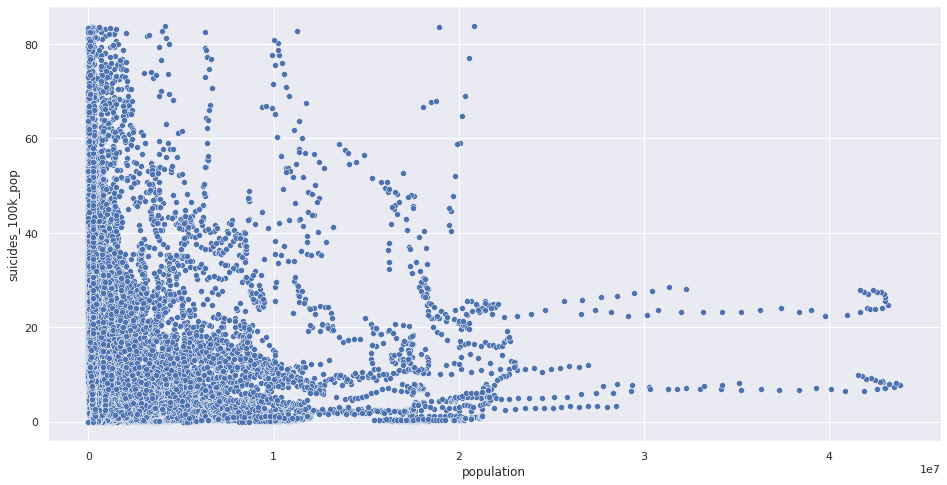

In [ ]:
sns.scatterplot(x="population", y="suicides_100k_pop",
                data=df)

### START

Колонки по которым будем выполнять кластеризацию

In [ ]:
col=['min_max_norm_suicides_100k_pop',	'min_max_norm_suicides_no']

Эта библиотека автоматически приведет данные к нормальным значениям

In [ ]:
#from sklearn import preprocessing
#dataNorm = preprocessing.MinMaxScaler().fit_transform(X[col].values)

In [ ]:
dataNorm = X[col].to_numpy()

In [ ]:
dataNorm

array([[6.19405657e-02, 9.16117950e-04],
       [3.91454828e-02, 5.15316347e-04],
       [8.71225683e-03, 5.72573719e-05],
       ...,
       [1.81047858e-01, 2.97165760e-02],
       [1.38560687e-01, 1.82078443e-02],
       [1.35219000e-01, 8.24506155e-03]])

Вычислим расстояния между каждым набором данных\
Вычисляется евклидово расстояние 

In [ ]:
data_dist = pdist(dataNorm, 'euclidean')

Главная функция иерархической кластеризии

Объедение элементов в кластера и сохранение в специальной переменной используется ниже для визуализации и выделения количества кластеров

Формула для метода **average**

\

The simple average algorithm defines the distance between clusters as the average distance between each of the members, weighted so that the two clusters have an equal influence on the final output.

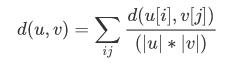

Числитель - сумма расстояний между i j елементом кластеров u v

\
Знаменатель - |u| |v| количество елементов в кластерах

In [ ]:
data_linkage = linkage(data_dist, method='average')

In [ ]:
data_linkage

array([[3.49800000e+03, 3.50800000e+03, 0.00000000e+00, 2.00000000e+00],
       [7.29000000e+02, 7.43000000e+02, 0.00000000e+00, 2.00000000e+00],
       [4.80000000e+01, 4.90000000e+01, 0.00000000e+00, 2.00000000e+00],
       ...,
       [1.36340000e+04, 1.36590000e+04, 4.70678445e-01, 3.10000000e+01],
       [1.36560000e+04, 1.36610000e+04, 5.23274648e-01, 6.80200000e+03],
       [1.36620000e+04, 1.36630000e+04, 8.09055933e-01, 6.83300000e+03]])

## Elbow method

Локоть - точка где общая обьясненная дисперсия выравнивается после подьема

### FIRST

In [ ]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X[col])
    distortions.append(kmeanModel.inertia_)

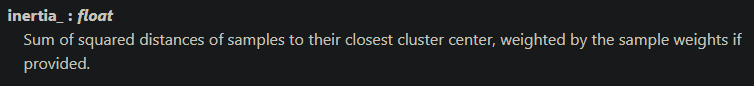

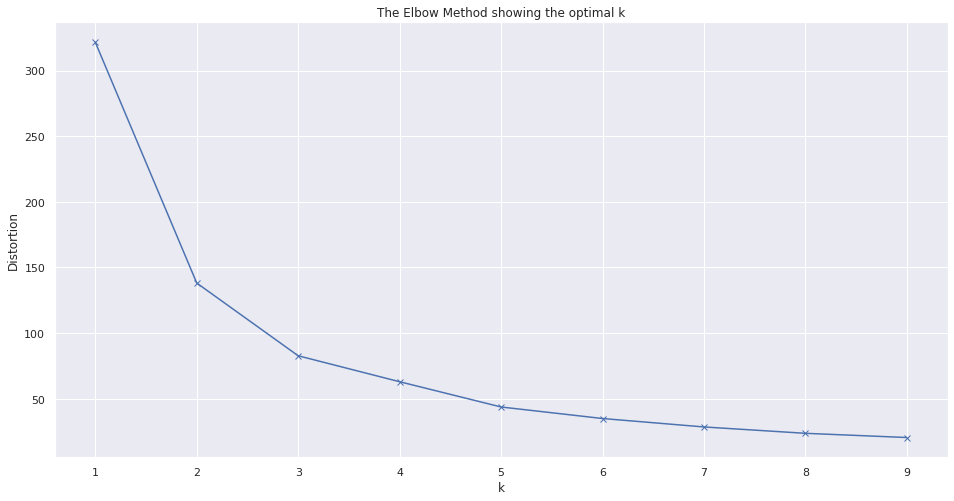

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### SECOND

In [ ]:
data_linkage[-10:, 2]

array([0.19402807, 0.251907  , 0.2572542 , 0.289004  , 0.31734073,
       0.32156281, 0.44297401, 0.47067845, 0.52327465, 0.80905593])

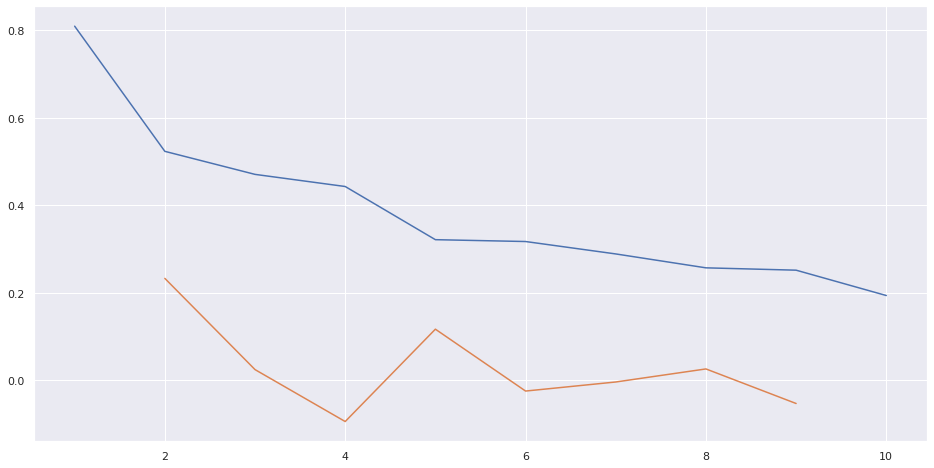

Рекомендованное количество кластеров: 2


In [ ]:
last = data_linkage[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)


acceleration = np.diff(last, 2)  
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2 
print("Рекомендованное количество кластеров:", k) 

**Желтая** - динамика изменения \
**Синяя** - абсолютное изменение расстояния. После перехода с 1 кластера до 2, дальше расстояние между кластерами 
падает меньше

## Функция построения дендрограмм

### Количество кластеров

In [ ]:
nClust=3

### FIRST

In [ ]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):

        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')

        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

Строим дендограмму

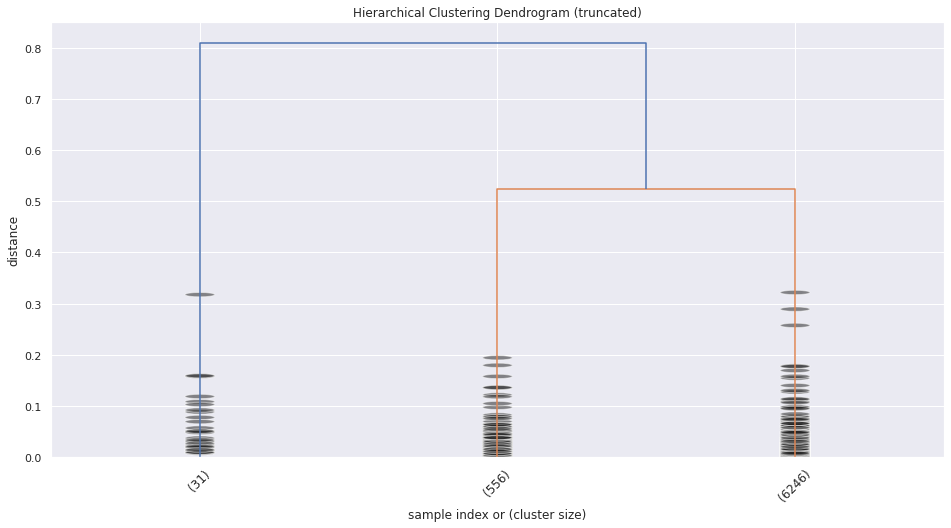

In [ ]:
fancy_dendrogram(
    data_linkage,
    truncate_mode='lastp',
    p=nClust, 
    leaf_rotation=45.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
)
plt.show()

### SECOND

In [ ]:
from scipy.cluster import hierarchy as hc

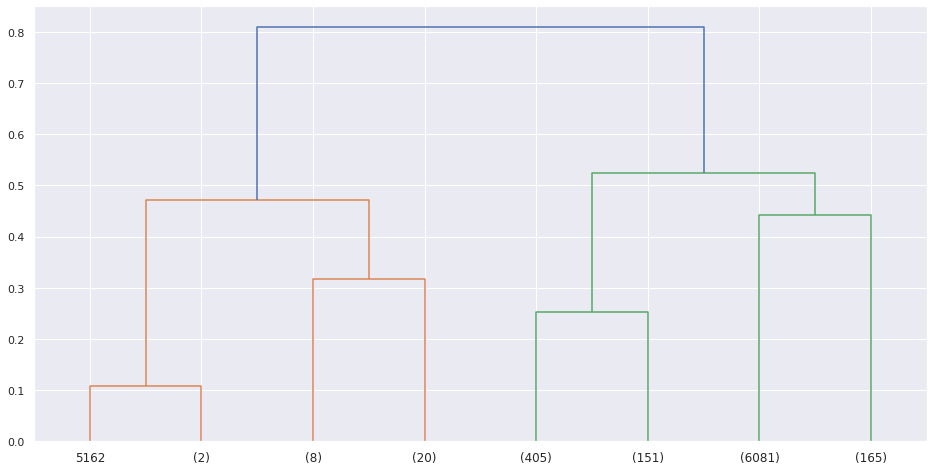

In [ ]:
hc.dendrogram(data_linkage, p=2, truncate_mode='level')
plt.show()

## KMeans

In [ ]:
dataNorm

array([[6.19405657e-02, 9.16117950e-04],
       [3.91454828e-02, 5.15316347e-04],
       [8.71225683e-03, 5.72573719e-05],
       ...,
       [1.81047858e-01, 2.97165760e-02],
       [1.38560687e-01, 1.82078443e-02],
       [1.35219000e-01, 8.24506155e-03]])

In [ ]:
km = KMeans(n_clusters = nClust)

In [ ]:
km.fit(dataNorm)

KMeans(n_clusters=3)

In [ ]:
labels = km.labels_ + 1

In [ ]:
pd.Series(labels).value_counts()

2    3462
1    2664
3     707
dtype: int64

In [ ]:
centroids = km.cluster_centers_

In [ ]:
centroids

array([[0.33569419, 0.03967385],
       [0.1068798 , 0.01078625],
       [0.70276434, 0.09189621]])

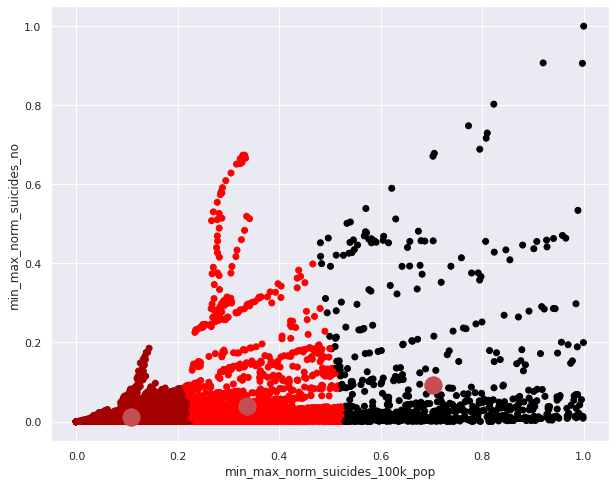

In [ ]:
x=0 # Чтобы построить диаграмму в разных осях, меняйте номера столбцов
y=1 #
plt.figure(figsize=(10, 8))



plt.scatter(dataNorm[:,x], dataNorm[:,y], c=labels, cmap='flag')

plt.scatter(centroids[:, x], centroids[:, y], marker='o', s=300,
            c='r', label='centroid')



plt.xlabel(col[x])
plt.ylabel(col[y]);
plt.show()

In [ ]:
X.head()

,index,country,year,sex,age,suicides_no,population,suicides_100k_pop,gdp_per_capita,suicides_cuts,min_max_norm_suicides_100k_pop,min_max_norm_suicides_no
0,1,Albania,1987,male,35-54 years,16,308000,5.19,796,"(6.0, 23.0]",0.061941,0.000916
1,4,Albania,1987,male,25-34 years,9,274300,3.28,796,"(6.0, 23.0]",0.039145,0.000515
2,8,Albania,1987,male,55-74 years,1,137500,0.73,796,"(-0.001, 1.0]",0.008712,0.000057
3,15,Albania,1988,male,35-54 years,14,314100,4.46,769,"(6.0, 23.0]",0.053228,0.000802
4,16,Albania,1988,male,55-74 years,4,140200,2.85,769,"(1.0, 6.0]",0.034014,0.000229


In [ ]:
X['clust_no'] = labels

In [ ]:
res = X.groupby('clust_no')['suicides_no', 'population',	'suicides_100k_pop',	'gdp_per_capita',	'min_max_norm_suicides_100k_pop',	'min_max_norm_suicides_no'].mean()

<ipython-input-113-281e7ebc65bf>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  res = X.groupby('clust_no')['suicides_no', 'population',	'suicides_100k_pop',	'gdp_per_capita',	'min_max_norm_suicides_100k_pop',	'min_max_norm_suicides_no'].mean()


In [ ]:
res

,suicides_no,population,suicides_100k_pop,gdp_per_capita,min_max_norm_suicides_100k_pop,min_max_norm_suicides_no
clust_no,,,,,,
1,690.965841,2.536596e+06,28.095364,22172.811186,0.335307,0.039563
2,188.396014,1.781321e+06,8.938536,14495.291161,0.106678,0.010787
3,1605.338048,2.826542e+06,58.840057,11062.155587,0.702232,0.091917


Посчитаем сколько елементов в каждом кластере

In [ ]:
pd.Series(labels).value_counts()

2    3462
1    2664
3     707
dtype: int64

In [ ]:
centroids

array([[0.33569419, 0.03967385],
       [0.1068798 , 0.01078625],
       [0.70276434, 0.09189621]])

In [ ]:
res = res.assign(count_km = pd.Series(labels).value_counts())

In [ ]:
res['centres_x'] = centroids[:,0]

In [ ]:
res['centres_y'] = centroids[:,1]

In [ ]:
res

,suicides_no,population,suicides_100k_pop,gdp_per_capita,min_max_norm_suicides_100k_pop,min_max_norm_suicides_no,count_km,centres_x,centres_y
clust_no,,,,,,,,,
1,690.965841,2.536596e+06,28.095364,22172.811186,0.335307,0.039563,2664,0.335694,0.039674
2,188.396014,1.781321e+06,8.938536,14495.291161,0.106678,0.010787,3462,0.106880,0.010786
3,1605.338048,2.826542e+06,58.840057,11062.155587,0.702232,0.091917,707,0.702764,0.091896


### Добавим количество елементов в кластере опираясь на дендрограмму

In [ ]:
#count_dendrog = [6246, 556, 31]
count_dendrog = [6802, 31]

In [ ]:
count_dendrog_df = pd.DataFrame({'count_dendrog':count_dendrog})

In [ ]:
count_dendrog_df

,count_dendrog
0,6802
1,31


In [ ]:
count_dendrog_df.index += 1

In [ ]:
res = res.join(count_dendrog_df)

## RESULT

In [ ]:
res = res.reset_index()

In [ ]:
res

,clust_no,suicides_no,population,suicides_100k_pop,gdp_per_capita,min_max_norm_suicides_100k_pop,min_max_norm_suicides_no,count_km,centres_x,centres_y,count_dendrog
0,1,690.965841,2.536596e+06,28.095364,22172.811186,0.335307,0.039563,2664,0.335694,0.039674,6802.0
1,2,188.396014,1.781321e+06,8.938536,14495.291161,0.106678,0.010787,3462,0.106880,0.010786,31.0
2,3,1605.338048,2.826542e+06,58.840057,11062.155587,0.702232,0.091917,707,0.702764,0.091896,NaN


# **HW_4**
- вибрати з дз 3 два кластера з найбільшою кількістю елементів.

- класифікувати методом опорних векторів.
- описати:
= яке ядро ви використовували і який вигляд воно має для ваших даних.
= яка точність класифікації.
= намалювати класи та розділяючу гіперлощину.
 Оформити в звіт.

 https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/?#h2_7

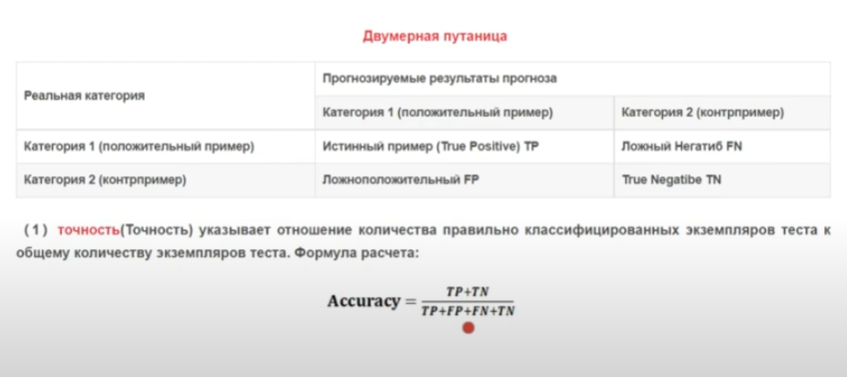

**Kernel for SVM: We have already discussed about it. \
Here, we have various options available with kernel like, “linear”, “rbf”,”poly” and others (default value is “rbf”).  
Here “rbf” and “poly” are useful for non-linear hyper-plane.**

**Penalty parameter C of the error term. It also controls the trade-off between smooth decision boundaries and classifying the training points correctly.**

**Linear SVM kernel if you have a large number of features (>1000) because it is more likely that the data is linearly separable in high dimensional space. Also, you can use RBF but do not forget to cross-validate for its parameters to avoid over-fitting.**

In [ ]:
X.head()

In [ ]:
col

In [ ]:
col1 = ['suicides_100k_pop',	'suicides_no']

In [ ]:
# create a mesh to plot in
x_min, x_max = X['suicides_100k_pop'].min() - 1, X['suicides_100k_pop'].max() + 1
y_min, y_max = X['suicides_no'].min() - 1, X['suicides_no'].max() + 1

stepp = abs((x_max / x_min) / 100)

xx, yy = np.meshgrid(np.arange(x_min, x_max, stepp),
                     np.arange(y_min, y_max, stepp))

### Kernel: linear 

In [ ]:
#C - SVM regularization parameter
svm_clf = svm.SVC(kernel='linear', C=1, gamma='auto').fit(X[col1], X['clust_no'])

In [ ]:
Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

In [ ]:
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.3)
plt.scatter(X['suicides_100k_pop'], X['suicides_no'], c=X['clust_no'], cmap=plt.cm.Paired)

In [ ]:
Z.shape

In [ ]:
X['clust_no'].shape

In [ ]:
#accuracy_score(X['clust_no'], Z)

In [ ]:
svm_clf.predict(X[col1])

In [ ]:
svm_clf.predict(X[col1]).reshape(-1,1)

In [ ]:
svm_clf.score(X[col1], X['clust_no'])

### Kernel: rbf

In [ ]:
svm_clf = svm.SVC() 

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

In [ ]:
grid_svm_clf = GridSearchCV(svm_clf, param_grid, n_jobs=-1, verbose = 3)

In [ ]:
grid_svm_clf.fit(X[col1], X['clust_no'])

In [ ]:
grid_svm_clf.best_params_

In [ ]:
best_grid_svm_clf = grid_svm_clf.best_estimator_

In [ ]:
grid_svm_clf.best_score_

In [ ]:
Z = best_grid_svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])

In [ ]:
Z = Z.reshape(xx.shape)

In [ ]:
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.3)
plt.scatter(X['suicides_100k_pop'], X['suicides_no'], c=X['clust_no'], cmap=plt.cm.Paired)

### Переобучились, попробуем без GridSearch

In [ ]:
#C - SVM regularization parameter
svm_clf = svm.SVC(kernel='rbf', C=1, gamma=0.001).fit(X[col1], X['clust_no'])

In [ ]:
Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

In [ ]:
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.3)
plt.scatter(X['suicides_100k_pop'], X['suicides_no'], c=X['clust_no'], cmap=plt.cm.Paired)

Еще больше переобучились))00)))

### Kernel: poly

SVM classifier

In [ ]:
svm_clf = svm.SVC(gamma='scale')

Parametrs

In [ ]:
# param_grid = {'C': [0.1, 1, 10, 100, 1000], 
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#               'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9],
#               'kernel': ['poly']} 

In [ ]:
param_grid = {'C': [0.1, 1], 
              #'gamma': [1, 0.1],
              'degree': [3],
              'kernel': ['poly']} 

GridSearch

In [ ]:
grid_svm_clf = GridSearchCV(svm_clf, param_grid, n_jobs=-1, verbose = 3)

Poly features

In [ ]:
poly = PolynomialFeatures(degree=3)

In [ ]:
X_poly = poly.fit_transform(X[col1])

In [ ]:
X_poly

Fit grid_svm_clf

In [ ]:
grid_svm_clf.fit(X_poly, X['clust_no'])

In [ ]:
grid_svm_clf.best_params_

In [ ]:
best_grid_svm_clf = grid_svm_clf.best_estimator_

In [ ]:
grid_svm_clf.best_score_

Predict

In [ ]:
Z = best_grid_svm_clf.predict(poly.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

Draw

In [ ]:
plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X['suicides_100k_pop'], X['suicides_no'], c=X['clust_no'], cmap=plt.cm.Paired)

### Pros and Cons associated with SVM

PROS
* It works really well with a clear margin of separation
* It is effective in high dimensional spaces.
* It is effective in cases where the number of dimensions is greater than the number of samples.

*  It uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.


CONS
* It doesn’t perform well when we have large data set because the required training time is higher
* It also doesn’t perform very well, when the data set has more noise i.e. target classes are overlapping
* SVM doesn’t directly provide probability estimates, these are calculated using an expensive five-fold cross-validation. It is included in the related SVC method of Python scikit-learn library.

# HW_5
Прокласифікувати методом К найближчих судідів:
- поділити вибірку на тестову та начальну;
- розрахувати скільки потрібно обрати найближчих записів, щоб точність була не нижче 85%;
- порахувати точність для тестової вибірки;
- зробити крос валідацію на 3 блоках;
- зробити висновки.

https://machinelearningknowledge.ai/knn-classifier-in-sklearn-using-gridsearchcv-with-example/

In [ ]:
df

In [ ]:
X

Сделаем 3 кластера

In [ ]:
nClust=3

In [ ]:
km = KMeans(n_clusters = nClust)

In [ ]:
km.fit(dataNorm)

In [ ]:
labels = km.labels_ + 1

In [ ]:
pd.Series(labels).value_counts()

In [ ]:
centroids = km.cluster_centers_

In [ ]:
centroids

In [ ]:
x=0 # Чтобы построить диаграмму в разных осях, меняйте номера столбцов
y=1 #
plt.figure(figsize=(10, 8))



plt.scatter(dataNorm[:,x], dataNorm[:,y], c=labels, cmap='flag')

plt.scatter(centroids[:, x], centroids[:, y], marker='o', s=300,
            c='r', label='centroid')



plt.xlabel(col[x])
plt.ylabel(col[y]);
plt.show()

In [ ]:
X['clust_no'] = labels

In [ ]:
X['clust_no'].value_counts()

In [ ]:
col

Splitting our data into **Training and Testing** datasets


In [ ]:
y = X['clust_no']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X[col], y, random_state = 0)

In [ ]:
knn = KNeighborsClassifier(weights='uniform', metric='minkowski')

In [ ]:
param_grid = {'n_neighbors': list(range(1, 31))}

In [ ]:
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

In [ ]:
grid_search = grid.fit(X_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_score_

Лучший KNN (N=3)

In [ ]:
knn_best_clf = grid_search.best_estimator_

Точность на тестовом

In [ ]:
knn_best_clf.score(X_test, y_test)

Тоже точность на тестовом но по другому

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_pred = knn_best_clf.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
X_test

Отобразим на графике

In [ ]:
plt.figure(figsize = (10,8))


plt.scatter(X_test['min_max_norm_suicides_100k_pop'], X_test['min_max_norm_suicides_no'], c=y_pred, marker= 'o', s=100, edgecolors='black')
plt.title("Predicted values with k=3", fontsize=20)

Кроссвалидация на 3 блоках

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
cross_val_knn = cross_validate(knn_best_clf, X[col], y, cv=3)

In [ ]:
cross_val_knn['test_score']

Среднее значение валидации

In [ ]:
cross_val_knn['test_score'].mean()

Также можно было ради интереса сделать кроссвалидацию для например К=3 и К=5

# HW_6
Промоделювати множинну лінійну регресію на вашому датасеті:
- намалювати лінію регресії;
- написати рівняння множинної регресії;
- порахувати показники: RSS, RMSE, RSE, R^2, t_b. На їх основі оцінити регресію;
- використовуючи регресію та оцінки похибки, побудувати передбаченя на 3 кроки вперед.

https://www.youtube.com/watch?v=hhAbdfQ6k00

In [ ]:
import warnings
warnings.filterwarnings('ignore')

$ y = \beta_0 + \beta_1*X_1 + \beta_2*X_2 + ... + \beta_n*X_n $

In [ ]:
df

In [ ]:
df.info()

### **Перекодирую пол и возраст и в последсвтии буду использовать все переменные для регрессии кроме country**

In [ ]:
t = df.copy()

In [ ]:
t['sex_bin'] = t.sex.map(lambda x: 0 if x=='female' else 1)

In [ ]:
int(np.mean(list(map(int, '55-74 years'.split()[0].rstrip('+').split('-')))))

In [ ]:
t['age_mean'] = t.age.map(lambda x: int(np.mean(list(map(int, x.split()[0].rstrip('+').split('-'))))))

In [ ]:
t.head()

In [ ]:
sns.pairplot(df)

## Прологарифмируем целевую переменную

In [ ]:
log_y = np.log(t['suicides_no'])

In [ ]:
log_y.max()

In [ ]:
pd.DataFrame(log_y).head(10)

In [ ]:
np.isinf(log_y).sum()

In [ ]:
def inf_to_nan(x):
    maxx = 9.767954157240933
    #if x in [float("-inf"),float("inf")]: float("nan")
    if x in [float("-inf")]: return 0
    if x in [float("inf")]: return maxx
    return x

Plot if replace +-inf to NaN\
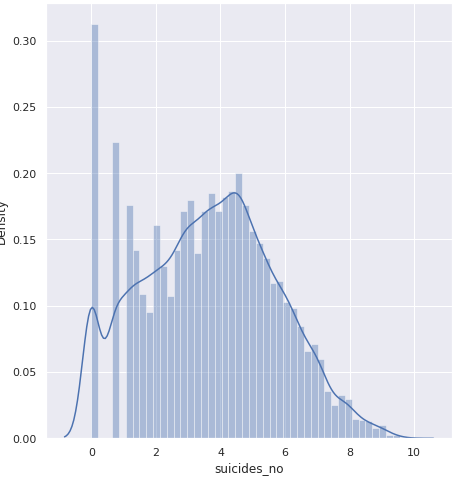 

In [ ]:
log_y = log_y.apply(inf_to_nan)

### Избавились от нанов в log_y

In [ ]:
np.any(np.isnan(log_y))

### Избавились от бесконечностей в log_y

In [ ]:
np.all(np.isfinite(log_y))

In [ ]:
sns.distplot(log_y)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('distribution of suicides number')

sns.distplot(log_y, ax=ax1)
sns.distplot(t.suicides_no, ax=ax2)

In [ ]:
X = t.drop(['country', 'sex', 'age'], axis=1)

mask = np.zeros_like(X.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(X.corr(), mask=mask, annot=True, fmt=".1f")

Зависимая переменная $y$ должна коррелировать с предикторными, но в тоже время нам нужно избежать мультиколлинеарности между предикторными

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [ ]:
X = t.drop(['suicides_no', 'country', 'sex', 'age'], axis=1)
y = t['suicides_no']

In [ ]:
y

In [ ]:
X.head()

### Результаты без логарифмирования целевого параметра

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

print('Training data r-squared:', lr.score(X_train, y_train) )
print('Test data r-squared:', lr.score(X_test, y_test) )
print('Intercept(\u03B2_0)', lr.intercept_)
pd.DataFrame(data=lr.coef_, index=X_train.columns, columns=['coef']).sort_values(by='coef', ascending=False)

### Результаты с логарифмированием

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, log_y, test_size=0.3, random_state=10)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

print('Training data r-squared:', lr.score(X_train, y_train) )
print('Test data r-squared:', lr.score(X_test, y_test) )
print('Intercept(\u03B2_0)', lr.intercept_)
pd.DataFrame(data=lr.coef_, index=X_train.columns, columns=['coef']).sort_values(by='coef', ascending=False)

### Видим смешной прирост)0 что и ожидаемо, да и в целом линейная модель на этом примере не сильно хороший вариант

### Уравнение регрессии

$suicides$  = $0.709$ + $0.077$ * suicides_100k_pop + $0.0027$ * age_mean + $0.00038$ * year + $2 * 10^-6$ * gdp_per_capita + $3 * 10^-7$ * population - $0.016$ * sex_bin

## График

In [ ]:
plt.title('Линия(и) регрессии')
plt.plot(X_test, lr.predict(X_test), c='red', linewidth=1)

In [ ]:
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

print(results.summary())

## показатели: RSS, RMSE, RSE, R^2, t_b

In [ ]:
from sklearn import metrics

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
true_pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [ ]:
true_pred_df

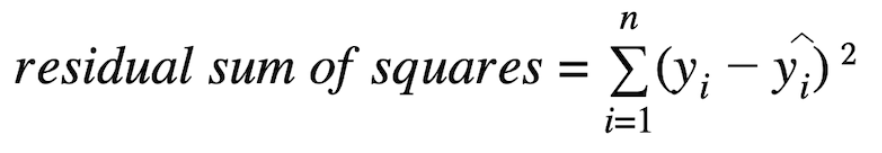

In [ ]:
print(' residual sum of squares is :', np.sum(np.square(true_pred_df['Predicted'] - true_pred_df['Actual'])))

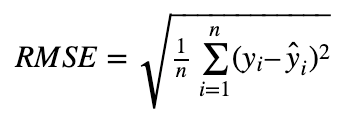

Based on a rule of thumb, it can be said that RMSE values between 0.2 and 0.5 shows that the model can relatively predict the data accurately.

In [ ]:
print(' RMSE is :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)) )

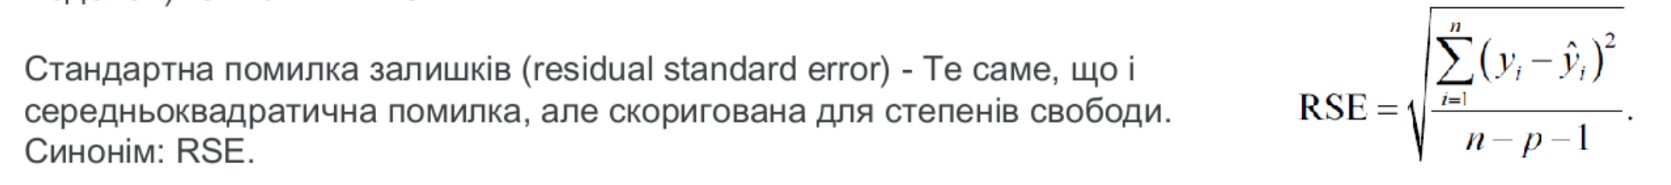

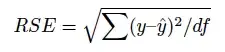

To get Residual Standard Error (RSE) of a regression model in python's statsmodels library, you can simply apply the standard deviation method with the degree of freedom equal to the number of predictors

This way, **it is easy to see that smaller RSE are found when the model prediction is more accurate**, which means the model is better. Another important aspect of RSE is that if RSE value is positive, it means that the model tends to overestimate values, while if RSE is negative, it means that the model tendency is to underestimate predictions

In [ ]:
X

In [ ]:
model = sm.OLS(y, X).fit()
print('RSE is:', model.resid.std(ddof=X.shape[1]))

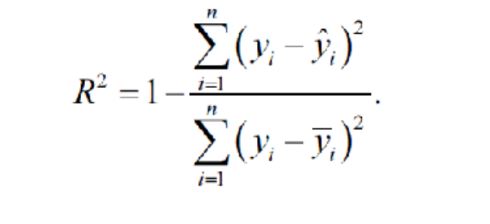

In [ ]:
print('R-squared:', lr.score(X_test, y_test) )

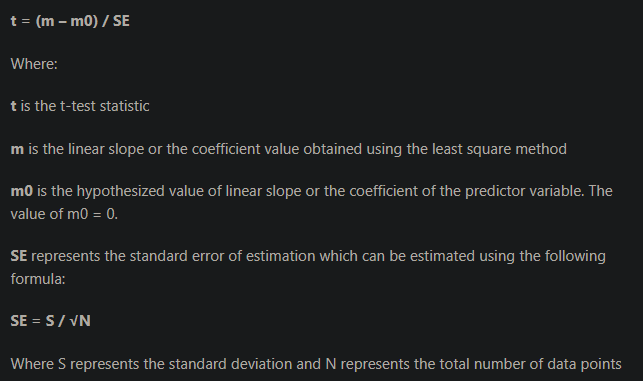

used to test the linearity of the relationship between the response variable and different predictor variables. In other words, it is used to determine whether or not there is a linear correlation between the response and predictor variables. The t-test helps to determine if this linear relationship is statistically significant

In [ ]:
slopes_log_df = pd.DataFrame(data=lr.coef_, index=X_train.columns, columns=['coef']).sort_values(by='coef', ascending=False)

In [ ]:
X_test.shape[0]

In [ ]:
N_root = np.sqrt(X_test.shape[0])

In [ ]:
np.std(slopes_log_df.coef)

In [ ]:
slopes_log_df

In [ ]:
pd.DataFrame(   slopes_log_df.coef / (np.std(slopes_log_df.coef)/N_root)   ).rename(columns={'coef': 't-stat'})

Но распределение не нормально так что не знаю на сколько это корректная оценка

## p-value
Проверим значимость/важность наших параметров что б решить стоит ли выбросить какие то

Другими словами узнать можно ли упростить модель, но не потерять при этом в скоре

In [ ]:
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

In [ ]:
pd.DataFrame ({'coef': results.params, 'p-value': round(results.pvalues, 3)})

Для модели c логарифмированием, sex_bin и year не весомый параметр

Для модели не c логарифмированием, year не весомый параметр

## Проверка на мультиколинеарность через VIF
строим лин регрессию но вместо целевой подставляем параметр, и соответственно чем лучше модель справляется, тем хуже, поскольку есть корреляция между параметрами 

In [ ]:
variance_inflation_factor(exog = X_incl_const.values, exog_idx = 1)

Хорошие результаты < 5

In [ ]:
vif = [variance_inflation_factor(exog=X_incl_const.values,
                                 exog_idx=i) for i in range(X_incl_const.shape[1])]

pd.DataFrame ({'coef_name': X_incl_const.columns,
                'vif': np.around(vif, 2)})

## Упрощение с BIC и просмотр метрик

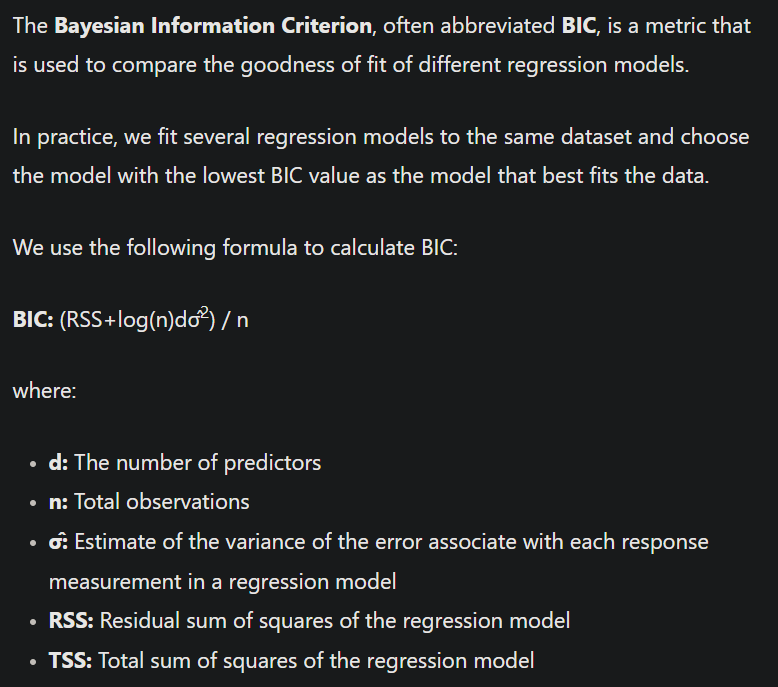

In [ ]:
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

pd.DataFrame ({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print('BIC is', results.bic)
print('r-squared is', results.rsquared)

In [ ]:
# Reduced model excluding YEAR and SEX_BIN
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['year', 'sex_bin'], axis=1)


model = sm.OLS(y_train, X_incl_const)
results = model.fit()

pd.DataFrame ({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print('BIC is', results.bic)
print('r-squared is', results.rsquared)

Модель стала немного проще, и $R^2$ не уменьшился

## Residuals/Остатки
Разница между предсказанным и трейн значениями

Нам важно что б в ошибках не было закономерности 

In [ ]:
# Using Statsmodel
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const) #Ordinary least squares
results = model.fit()


# Residuals vs Predicted values
plt.scatter(x=results.fittedvalues, y=results.resid, c='navy', alpha=0.6)

plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

А это плохо, точки разбросаны не рандомно

### Distribution of Residuals checking for normality

Видим большую перекошеность и не нормальность данных

In [ ]:
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

sns.distplot(results.resid, color= 'navy')
plt.title(f'residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()


### Переделаю модель используя suicides_100k_pop и age_mean и нарисую два графика проекций

In [ ]:
X = t[['suicides_100k_pop', 'age_mean']]
y = t['suicides_no']

In [ ]:
log_y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, log_y, test_size=0.3, random_state=10)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

print('Training data r-squared:', lr.score(X_train, y_train) )
print('Test data r-squared:', lr.score(X_test, y_test) )
print('Intercept(\u03B2_0)', lr.intercept_)
pd.DataFrame(data=lr.coef_, index=X_train.columns, columns=['coef']).sort_values(by='coef', ascending=False)

$suicides$  = $2.21$ + $0.081$ * suicides_100k_pop - $0.001$ * age_mean  

In [ ]:
lr.score?

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
plt.plot(X_test.suicides_100k_pop, lr.predict(X_test), c='red', linewidth=0.01)
plt.ylabel("suicides")
plt.xlabel("suicides_100k_pop")

In [ ]:
plt.plot(X_test.age_mean, lr.predict(X_test), c='blue', linewidth=0.01)
plt.ylabel("suicides")
plt.xlabel("age_mean")

In [ ]:
plt.scatter(X['suicides_100k_pop'], y, s=0.1)


In [ ]:
plt.scatter(X['age_mean'], y, s=1)


# HW_7

Для вихідних даних(ті що були в 1 дз) зробити:
- коробчасту діаграму, скрипковий графік, гістограму, графік густини, контурний графік. Для будь- яких атрибутів.
- побудувати коефіцієнти кореляцій для 2 атрибутів. побудувати кореляційну матицю.
- розрахувати моду та стандартну похибку.
- оцінити на який розподіл схожий розподіл ваших даних, виходячи з вигляду основних розділів з теорії ймовірності. (Біномініальний, Пуасоновський, Геометричний, Рівномірний, Показниковий або Гаусовський розподіли).
- зробити бутстрап вибірку для 1000 значень та обрахувати довірчий інтервал.

In [ ]:
%config InlineBackend.figure_format = 'retina'
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = 8, 5

In [ ]:
df

### коробчасту діаграму, скрипковий графік, гістограму, графік густини, контурний графік.

In [ ]:
g = sns.FacetGrid(df, col="age", height=11, aspect=1.2)
g.map(sns.boxplot, "year", "suicides_100k_pop")
g.add_legend()

In [ ]:
sns.set(rc={'figure.figsize':(16,8)})

 
sns.violinplot(x="year", y="suicides_100k_pop",
               data=df.query('age == "15-24 years"'))


In [ ]:
plt.figure(figsize=(16,7))


sex = sns.countplot(x='sex',data = df)

In [ ]:
plt.figure(figsize=(16,7))

#barplot
sns.barplot(x='sex', y='suicides_no', hue='age', data=df)

In [ ]:
sns.kdeplot(x='suicides_no', hue='age', data=df)
#sns.kdeplot(df.suicides_no)

In [ ]:
sns.kdeplot(x=df['year'], y=df['suicides_no'], cmap="Blues", shade=True, thresh=0)
plt.show()

In [ ]:
sns.kdeplot(x=df['gdp_per_capita'], y=df.query('suicides_no < 2500')['suicides_no'], cmap="Blues", shade=True) 

### побудувати коефіцієнти кореляцій для 2 атрибутів. побудувати кореляційну матицю.

In [ ]:
df['suicides_no'].corr(df['population'])

In [ ]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df.corr(), mask=mask, annot=True, fmt=".1f", cmap='YlGnBu')

### розрахувати моду та стандартну похибку.

In [ ]:
t = df.query('country == "Ukraine"').copy()

In [ ]:
t['sex_bin'] = t.sex.map(lambda x: 0 if x=='female' else 1)

In [ ]:
int(np.mean(list(map(int, '55-74 years'.split()[0].rstrip('+').split('-')))))

In [ ]:
t['age_mean'] = t.age.map(lambda x: int(np.mean(list(map(int, x.split()[0].rstrip('+').split('-'))))))

In [ ]:
t.drop(columns=['sex', 'age'], inplace=True)

In [ ]:
t.head()

**Стандартное отклонение - std**

In [ ]:
t.describe()

**Мода**
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html 


Мода для количества суицидов в Украине

In [ ]:
t.suicides_no.mode()

In [ ]:
t.mode(axis=0, numeric_only=True).head(10)

### оцінити на який розподіл схожий розподіл ваших даних, виходячи з вигляду основних розділів з теорії ймовірності. (Біномініальний, Пуасоновський, Геометричний, Рівномірний, Показниковий або Гаусовський розподіли).

**В зависимости от выбранной колонки наблюдаем Равномерное, Бернулиево и Геометрическое распределения**

In [ ]:
sns.pairplot(df)

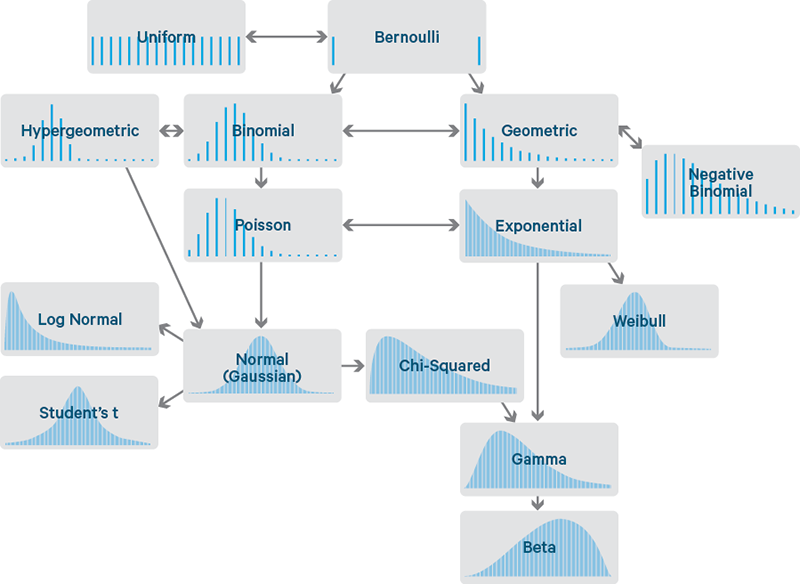

### зробити бутстрап вибірку для 1000 значень та обрахувати довірчий інтервал.

In [ ]:
def get_bootstrap_samples(data, n_samples):
    """Generate bootstrap samples using the bootstrap method."""
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples


def stat_intervals(stat, alpha):
    """Produce an interval estimate."""
    boundaries = np.percentile(stat, [100 * alpha / 2.0, 100 * (1 - alpha / 2.0)])
    return boundaries

In [ ]:
np.random.seed(0)

T = df['suicides_no'].values

# Generate the samples using bootstrapping and calculate the mean for each of them
mean_scores = [
    np.mean(sample) for sample in get_bootstrap_samples(T, 1000)
]


# Print the resulting interval estimates
print(
    "suicides amount: mean interval", stat_intervals(mean_scores, 0.05)
)


In [ ]:
df['suicides_no'].mean()

In [ ]:
df.describe()

Тут пробовал нарисовать интервал как в [видео](https://www.youtube.com/watch?v=dXR2V-_F3yg) но оставил.

In [ ]:
import numpy as np
import matplotlib.pylab as plt
from scipy.stats import norm
from scipy.stats import bootstrap
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.distributions.empirical_distribution import _conf_set


In [ ]:
T = df['suicides_no'].values

In [ ]:
sample_1000 = get_bootstrap_samples(T, 1000)

In [ ]:
bootstrap(df, statistic=np.mean, n_resamples=1000)

In [ ]:
sample_1000.shape

In [ ]:
T

In [ ]:
ecdf_1000 = ECDF(sample_1000)
y_sm_ecdf_1000 = ecdf_1000(sample_1000)

In [ ]:
alpha = 0.05
low_band_1000, up_band_1000 = _conf_set(y_sm_ecdf_1000, alpha=alpha)

plt.plot(np.sort(sample_1000), np.sort(y_sm_ecdf_1000), label= 'ECDF')
plt.plot(np.sort(sample_1000), rv_norm.cdf(np.sort(sample_1000)), label='True CDF')

plt.plot(np.sort(sample_1000), np.sort (low_band_1000), "--", label='L(X)')
plt.plot (np.sort(sample_1000), np.sort(up_band_1000), "--", label='U(X)')

plt.legend(fontsize-15)
plt.xlabel('Normal RV sample (N=1000)', fontsize = 15)


# HW_8 ?))0

- Для клатеризованих даних за дз 3 зробити випадкову вибірку.
- Кожен кластер поділити на 3, що і буде слугувати різними вибірками.
- Зробити переставний тест і перевірити наскільки гарно були організована випадкова вибірка.
- Додати результати і опис, що було зроблено.
- Перевірити p-значимість викидів.
- Побудувати t-статистику та оцінити її.
- Побудувати F-статистику та оцінити її.
- Порахувати хі-квадрат.
- Зробити звіт з висновками.

Запустил первые три дз

In [ ]:
X

,index,country,year,sex,age,suicides_no,population,suicides_100k_pop,gdp_per_capita,suicides_cuts,min_max_norm_suicides_100k_pop,min_max_norm_suicides_no,clust_no
0,1,Albania,1987,male,35-54 years,16,308000,5.19,796,"(6.0, 23.0]",0.061941,0.000916,2
1,4,Albania,1987,male,25-34 years,9,274300,3.28,796,"(6.0, 23.0]",0.039145,0.000515,2
2,8,Albania,1987,male,55-74 years,1,137500,0.73,796,"(-0.001, 1.0]",0.008712,0.000057,2
3,15,Albania,1988,male,35-54 years,14,314100,4.46,769,"(6.0, 23.0]",0.053228,0.000802,2
4,16,Albania,1988,male,55-74 years,4,140200,2.85,769,"(1.0, 6.0]",0.034014,0.000229,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6828,27797,Uzbekistan,2013,male,25-34 years,328,2644648,12.40,2150,"(240.0, 17465.0]",0.147989,0.018780,2
6829,27800,Uzbekistan,2013,male,55-74 years,119,1202790,9.89,2150,"(74.0, 240.0]",0.118033,0.006814,2
6830,27808,Uzbekistan,2014,male,35-54 years,519,3421300,15.17,2309,"(240.0, 17465.0]",0.181048,0.029717,2
6831,27809,Uzbekistan,2014,male,25-34 years,318,2739150,11.61,2309,"(240.0, 17465.0]",0.138561,0.018208,2


### Кожен кластер поділити на 3, що і буде слугувати різними вибірками.

In [ ]:
pd.Series(labels).value_counts()

2    3462
1    2664
3     707
dtype: int64

In [ ]:
np.unique(labels)

array([1, 2, 3], dtype=int32)

In [ ]:
X[X['clust_no']==1]

,index,country,year,sex,age,suicides_no,population,suicides_100k_pop,gdp_per_capita,suicides_cuts,min_max_norm_suicides_100k_pop,min_max_norm_suicides_no,clust_no
105,420,Antigua and Barbuda,2000,male,55-74 years,1,3333,30.00,11021,"(-0.001, 1.0]",0.358038,0.000057,1
108,432,Antigua and Barbuda,2001,male,35-54 years,2,10281,19.45,10468,"(1.0, 6.0]",0.232128,0.000115,1
114,456,Antigua and Barbuda,2003,male,55-74 years,1,3594,27.82,10878,"(-0.001, 1.0]",0.332021,0.000057,1
117,468,Antigua and Barbuda,2004,male,55-74 years,1,3665,27.29,11535,"(-0.001, 1.0]",0.325695,0.000057,1
147,589,Argentina,1985,male,55-74 years,485,1997000,24.29,3264,"(240.0, 17465.0]",0.289891,0.027770,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6797,27676,Uzbekistan,2000,male,35-54 years,528,2289656,23.06,632,"(240.0, 17465.0]",0.275212,0.030232,1
6798,27677,Uzbekistan,2000,male,25-34 years,355,1843476,19.26,632,"(240.0, 17465.0]",0.229860,0.020326,1
6799,27678,Uzbekistan,2000,male,55-74 years,153,802122,19.07,632,"(74.0, 240.0]",0.227593,0.008760,1
6800,27688,Uzbekistan,2001,male,35-54 years,513,2389813,21.47,513,"(240.0, 17465.0]",0.256236,0.029373,1


In [ ]:
5954+879

6833

In [ ]:
dictt = {}
for i in np.unique(labels):
  X_1 = X[X['clust_no']==i].sample(frac=.3333, random_state=1)                                            #Тут у нас треть от общего
  dictt[f"X1__clust_{i}"] = X_1

  X_2 = pd.concat([X[X['clust_no']==i], X_1]).drop_duplicates(keep=False)                               #Тут у нас две трети от общего
  dictt[f"X2__clust_{i}"] = X_2[X_2['clust_no']==i].sample(frac=.5, random_state=1)                     #Взяли от двух третьих половину

  tempp = X_2[X_2['clust_no']==i].sample(frac=.5, random_state=1)
  
  X_3 = pd.concat([X_2, tempp]).drop_duplicates(keep=False)                                             #Взяли вторую половину от двух третьих
  dictt[f"X3__clust_{i}"] = X_3  


In [ ]:
dictt.keys()

dict_keys(['X1__clust_1', 'X2__clust_1', 'X3__clust_1', 'X1__clust_2', 'X2__clust_2', 'X3__clust_2', 'X1__clust_3', 'X2__clust_3', 'X3__clust_3'])

In [ ]:
for k,v in dictt.items():
  print(v.shape)

(888, 13)
(888, 13)
(888, 13)
(1154, 13)
(1154, 13)
(1154, 13)
(236, 13)
(236, 13)
(235, 13)


Сделать проверку на не равность сабфреймов

In [ ]:
dictt['X1__clust_1'].equals(dictt['X3__clust_1'])     

False

In [ ]:
np.array_equal(dictt['X1__clust_1'],dictt['X3__clust_1'])

False

In [ ]:
dictt['X1__clust_1']['index'].values == dictt['X3__clust_1']['index'].values

In [ ]:
all(dictt['X1__clust_1']['index'].values == dictt['X3__clust_1']['index'].values)

False

### Cделать одинаковое количество в поддатафреймах

In [ ]:
dictt['X1__clust_1']

,index,country,year,sex,age,suicides_no,population,suicides_100k_pop,gdp_per_capita,suicides_cuts,min_max_norm_suicides_100k_pop,min_max_norm_suicides_no,clust_no
4047,16554,Mauritius,2016,male,25-34 years,17,87701,19.38,10570,"(6.0, 23.0]",0.231293,0.000973,1
921,3765,Belgium,2012,male,35-54 years,617,1588342,38.85,47678,"(240.0, 17465.0]",0.463659,0.035328,1
1767,7145,Czech Republic,1994,male,55-74 years,333,825100,40.36,4891,"(240.0, 17465.0]",0.481680,0.019067,1
6761,27533,Uruguay,2014,male,35-54 years,150,421245,35.61,18012,"(74.0, 240.0]",0.424991,0.008589,1
5194,21239,Russian Federation,2014,male,55-74 years,4501,11808589,38.12,15319,"(240.0, 17465.0]",0.454947,0.257715,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5424,22163,Serbia,2014,male,35-54 years,219,971340,22.55,6500,"(74.0, 240.0]",0.269125,0.012539,1
6724,27379,Uruguay,2000,male,25-34 years,60,235863,25.44,7483,"(23.0, 74.0]",0.303616,0.003435,1
874,3574,Belgium,1996,male,55-74 years,352,961063,36.63,29438,"(240.0, 17465.0]",0.437164,0.020155,1
3001,12143,Ireland,1992,male,35-54 years,82,416800,19.67,17051,"(74.0, 240.0]",0.234754,0.004695,1


In [ ]:
dictt['X2__clust_1']

,index,country,year,sex,age,suicides_no,population,suicides_100k_pop,gdp_per_capita,suicides_cuts,min_max_norm_suicides_100k_pop,min_max_norm_suicides_no,clust_no
4735,19297,Poland,2011,male,35-54 years,2205,5201212,42.39,14686,"(240.0, 17465.0]",0.505908,0.126253,1
6637,27031,United States,2000,male,25-34 years,3938,20120529,19.57,39218,"(240.0, 17465.0]",0.233560,0.225480,1
1273,5170,Canada,2006,male,55-74 years,599,2910932,20.58,42566,"(240.0, 17465.0]",0.245614,0.034297,1
502,2004,Austria,2003,male,35-54 years,371,1231545,30.12,33889,"(240.0, 17465.0]",0.359470,0.021242,1
6318,25744,Turkmenistan,1989,male,35-54 years,64,258100,24.80,1003,"(23.0, 74.0]",0.295978,0.003664,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,15367,Luxembourg,1990,male,55-74 years,12,32400,37.04,36871,"(6.0, 23.0]",0.442058,0.000687,1
1654,6692,Cuba,1997,male,35-54 years,446,1376101,32.41,2472,"(240.0, 17465.0]",0.386800,0.025537,1
2111,8549,Estonia,2011,male,25-34 years,23,95987,23.96,18545,"(6.0, 23.0]",0.285953,0.001317,1
4345,17738,New Zealand,2009,male,25-34 years,64,267390,23.94,30259,"(23.0, 74.0]",0.285714,0.003664,1


In [ ]:
#dictt['X2__clust_1'] = dictt['X2__clust_1'].drop(labels=2145, axis=0)

In [ ]:
dictt['X1__clust_3']

,index,country,year,sex,age,suicides_no,population,suicides_100k_pop,gdp_per_capita,suicides_cuts,min_max_norm_suicides_100k_pop,min_max_norm_suicides_no,clust_no
3710,15188,Lithuania,2007,male,55-74 years,220,267333,82.29,12869,"(74.0, 240.0]",0.982098,0.012597,3
3730,15286,Lithuania,2015,male,35-54 years,275,387255,71.01,15073,"(240.0, 17465.0]",0.847476,0.015746,3
3733,15298,Lithuania,2016,male,35-54 years,266,376689,70.62,15742,"(240.0, 17465.0]",0.842821,0.015230,3
888,3633,Belgium,2001,male,35-54 years,686,1524828,44.99,24494,"(240.0, 17465.0]",0.536938,0.039279,3
5184,21202,Russian Federation,2011,male,35-54 years,9411,19684905,47.81,15226,"(240.0, 17465.0]",0.570593,0.538849,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5660,23110,Slovenia,2001,male,35-54 years,177,311844,56.76,10979,"(74.0, 240.0]",0.677408,0.010135,3
2777,11220,Guyana,2002,male,35-54 years,59,81725,72.19,1090,"(23.0, 74.0]",0.861559,0.003378,3
5179,21179,Russian Federation,2009,male,55-74 years,5637,10645241,52.95,9118,"(240.0, 17465.0]",0.631937,0.322760,3
3344,13521,Japan,1998,male,55-74 years,7981,13546000,58.92,33791,"(240.0, 17465.0]",0.703187,0.456971,3


In [ ]:
dictt['X2__clust_3']

,index,country,year,sex,age,suicides_no,population,suicides_100k_pop,gdp_per_capita,suicides_cuts,min_max_norm_suicides_100k_pop,min_max_norm_suicides_no,clust_no
3354,13558,Japan,2001,male,35-54 years,7913,17516000,45.18,35843,"(240.0, 17465.0]",0.539205,0.453078,3
5016,20423,Republic of Korea,2001,male,55-74 years,1331,2796018,47.60,11922,"(240.0, 17465.0]",0.568087,0.076210,3
822,3369,Belarus,2008,male,35-54 years,961,1395695,68.85,6601,"(240.0, 17465.0]",0.821697,0.055024,3
6444,26262,Ukraine,2003,male,35-54 years,4312,6534189,65.99,1097,"(240.0, 17465.0]",0.787564,0.246894,3
3659,14865,Latvia,2001,male,35-54 years,252,305252,82.55,3724,"(240.0, 17465.0]",0.985201,0.014429,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5181,21190,Russian Federation,2010,male,35-54 years,10304,19786280,52.08,11307,"(240.0, 17465.0]",0.621554,0.589980,3
1584,6417,Croatia,1999,male,55-74 years,225,394300,57.06,5459,"(74.0, 240.0]",0.680988,0.012883,3
2852,11557,Hungary,2007,male,55-74 years,567,927533,61.13,14609,"(240.0, 17465.0]",0.729562,0.032465,3
5680,23193,Slovenia,2008,male,55-74 years,96,206257,46.54,28599,"(74.0, 240.0]",0.555436,0.005497,3


In [ ]:
dictt['X1__clust_3'] = dictt['X1__clust_3'].drop(labels=6470, axis=0)

In [ ]:
dictt['X2__clust_3'] = dictt['X2__clust_3'].drop(labels=5970, axis=0)

In [ ]:
for k,v in dictt.items():
  print(v.shape)

(888, 13)
(888, 13)
(888, 13)
(1154, 13)
(1154, 13)
(1154, 13)
(235, 13)
(235, 13)
(235, 13)


### Зробити переставний тест і перевірити наскільки гарно були організована випадкова вибірка.

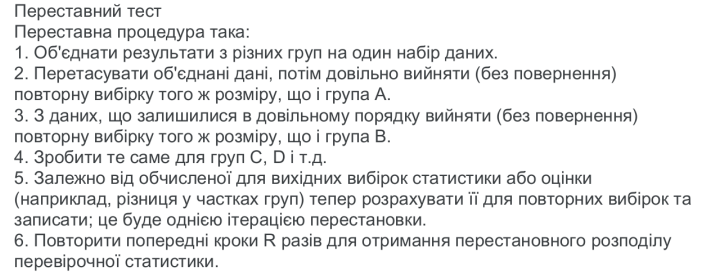

In [ ]:
dictt.keys()

dict_keys(['X1__clust_1', 'X2__clust_1', 'X3__clust_1', 'X1__clust_2', 'X2__clust_2', 'X3__clust_2', 'X1__clust_3', 'X2__clust_3', 'X3__clust_3'])

In [ ]:
frames = [dictt['X1__clust_1'], dictt['X2__clust_1'], dictt['X3__clust_1'],
          dictt['X1__clust_2'], dictt['X2__clust_2'], dictt['X3__clust_2'],
          dictt['X1__clust_3'], dictt['X2__clust_3'], dictt['X3__clust_3']]

all_frames = pd.concat(frames)

In [ ]:
all_frames

,index,country,year,sex,age,suicides_no,population,suicides_100k_pop,gdp_per_capita,suicides_cuts,min_max_norm_suicides_100k_pop,min_max_norm_suicides_no,clust_no
4047,16554,Mauritius,2016,male,25-34 years,17,87701,19.38,10570,"(6.0, 23.0]",0.231293,0.000973,1
921,3765,Belgium,2012,male,35-54 years,617,1588342,38.85,47678,"(240.0, 17465.0]",0.463659,0.035328,1
1767,7145,Czech Republic,1994,male,55-74 years,333,825100,40.36,4891,"(240.0, 17465.0]",0.481680,0.019067,1
6761,27533,Uruguay,2014,male,35-54 years,150,421245,35.61,18012,"(74.0, 240.0]",0.424991,0.008589,1
5194,21239,Russian Federation,2014,male,55-74 years,4501,11808589,38.12,15319,"(240.0, 17465.0]",0.454947,0.257715,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6713,27341,Uruguay,1997,male,55-74 years,115,246859,46.59,8012,"(74.0, 240.0]",0.556033,0.006585,3
6716,27353,Uruguay,1998,male,55-74 years,123,247165,49.76,8420,"(74.0, 240.0]",0.593866,0.007043,3
6722,27377,Uruguay,2000,male,55-74 years,141,247499,56.97,7483,"(74.0, 240.0]",0.679914,0.008073,3
6725,27389,Uruguay,2001,male,55-74 years,119,247337,48.11,6827,"(74.0, 240.0]",0.574174,0.006814,3


In [ ]:
all_frames.index.nunique()

6831

In [ ]:
all_frames = all_frames.sample(frac=1, random_state=1) #Перемешали

In [ ]:
dictt2 = {}
for i in np.unique(labels):
  X_1 = all_frames[all_frames['clust_no']==i].sample(frac=.3333, random_state=1)                        #Тут у нас треть от общего
  dictt2[f"X1__clust_{i}"] = X_1

  X_2 = pd.concat([all_frames[all_frames['clust_no']==i], X_1]).drop_duplicates(keep=False)                               #Тут у нас две трети от общего
  dictt2[f"X2__clust_{i}"] = X_2[X_2['clust_no']==i].sample(frac=.5, random_state=1)                     #Взяли от двух третьих половину

  tempp = X_2[X_2['clust_no']==i].sample(frac=.5, random_state=1)
  
  X_3 = pd.concat([X_2, tempp]).drop_duplicates(keep=False)                                             #Взяли вторую половину от двух третьих
  dictt2[f"X3__clust_{i}"] = X_3  


In [ ]:
dictt2.keys()

dict_keys(['X1__clust_1', 'X2__clust_1', 'X3__clust_1', 'X1__clust_2', 'X2__clust_2', 'X3__clust_2', 'X1__clust_3', 'X2__clust_3', 'X3__clust_3'])

Доделать

к примеру посмотрим на дисперсии для suicides_100k_pop

In [ ]:
X['suicides_100k_pop'].var()

288.60464347744926

In [ ]:
X.query('clust_no == 1')['suicides_100k_pop'].var()

44.938584471201395

In [ ]:
X.query('clust_no == 2')['suicides_100k_pop'].var()

32.977544257477604

In [ ]:
X.query('clust_no == 3')['suicides_100k_pop'].var()

127.57380396280018

In [ ]:
t1t = 0
for k,v in dictt.items():
  print(f'Variance {k} =',dictt[k]['suicides_100k_pop'].var())
  t1t +=1
  if t1t%3==0:
    print()

Variance X1__clust_1 = 46.482627583107345
Variance X2__clust_1 = 45.01782652071463
Variance X3__clust_1 = 43.384606772372706

Variance X1__clust_2 = 32.275398867320725
Variance X2__clust_2 = 33.638589245521814
Variance X3__clust_2 = 33.07277514771953

Variance X1__clust_3 = 122.91922097472266
Variance X2__clust_3 = 135.3937071358429
Variance X3__clust_3 = 125.18264495362793



In [ ]:
t1t = 0
for k,v in dictt2.items():
  print(f'Variance {k} =', dictt2[k]['suicides_100k_pop'].var())
  t1t +=1
  if t1t%3==0:
    print()

Variance X1__clust_1 = 44.283341343809994
Variance X2__clust_1 = 45.7951907146013
Variance X3__clust_1 = 44.7423017488599

Variance X1__clust_2 = 31.82174361848602
Variance X2__clust_2 = 33.629337534966425
Variance X3__clust_2 = 33.51721132363617

Variance X1__clust_3 = 137.06592853246048
Variance X2__clust_3 = 123.09033724313511
Variance X3__clust_3 = 120.15574174577196



### Перевірити p-значимість викидів.

[Немного за p-value](https://www.codecamp.ru/blog/p-values-statistical-significance/)

$Z_{score} = (x - mean) / std.deviation$

In [ ]:
mean_X = np.mean(X['suicides_100k_pop'])
std_X = np.std(X['suicides_100k_pop'])

print('mean of the dataset is ', mean_X)
print('std.deviation is ', std_X)

mean of the dataset is  21.57049319478999
std.deviation is  16.98712472996059


Calculate Z score. If Z score > threshold, print it as an outlier.

**Z score is also called standard score. This score helps to understand if a data value is greater or smaller than mean and how far away it is from the mean. More specifically, Z score tells how many standard deviations away a data point is from the mean.**



In [ ]:
ttemp = X[['suicides_100k_pop']].copy()

In [ ]:
ttemp

,suicides_100k_pop,Z_score,is_outlier,p_value_two_tailed_test
0,5.19,-0.964289,0,0.334901
1,3.28,-1.076727,0,0.281602
2,0.73,-1.226841,0,0.219883
3,4.46,-1.007262,0,0.313809
4,2.85,-1.102040,0,0.270444
...,...,...,...,...
6828,12.40,-0.539850,0,0.589301
6829,9.89,-0.687609,0,0.491699
6830,15.17,-0.376785,0,0.706333
6831,11.61,-0.586355,0,0.557637


In [ ]:
ttemp['Z_score'] = (ttemp['suicides_100k_pop'] - mean_X) / std_X

In [ ]:
def outlier_test_Z_score(i, mean_X, std_X, threshold=3):
  z = (i - mean_X) / std_X
  if z > threshold:
    return 1
  else:
    return 0   

In [ ]:
ttemp['is_outlier'] = ttemp['suicides_100k_pop'].apply(lambda x: outlier_test_Z_score(x, mean_X, std_X, threshold=3))

In [ ]:
ttemp['is_outlier'].value_counts()

0    6719
1     114
Name: is_outlier, dtype: int64

Предположим, мы хотим найти p-значение, связанное с z-показателем в двустороннем тесте гипотезы.

In [ ]:
import scipy.stats

#find p-value for two-tailed test
ttemp['p_value_two_tailed_test'] = scipy.stats.norm.sf(abs(ttemp['Z_score'])) * 2

### T-test

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

https://russianblogs.com/article/81891435836/

In [ ]:
from sklearn import metrics 
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy import stats
from scipy.stats import chisquare

In [ ]:
X.head()

,index,country,year,sex,age,suicides_no,population,suicides_100k_pop,gdp_per_capita,suicides_cuts,min_max_norm_suicides_100k_pop,min_max_norm_suicides_no,clust_no
0,1,Albania,1987,male,35-54 years,16,308000,5.19,796,"(6.0, 23.0]",0.061941,0.000916,2
1,4,Albania,1987,male,25-34 years,9,274300,3.28,796,"(6.0, 23.0]",0.039145,0.000515,2
2,8,Albania,1987,male,55-74 years,1,137500,0.73,796,"(-0.001, 1.0]",0.008712,0.000057,2
3,15,Albania,1988,male,35-54 years,14,314100,4.46,769,"(6.0, 23.0]",0.053228,0.000802,2
4,16,Albania,1988,male,55-74 years,4,140200,2.85,769,"(1.0, 6.0]",0.034014,0.000229,2


In [ ]:
stats.ttest_ind(X['suicides_no'], X['population'])

Ttest_indResult(statistic=-40.655380949652375, pvalue=0.0)

In [ ]:
print(stats.ttest_ind(dictt['X1__clust_1']['suicides_no'], dictt['X1__clust_1']['population']))
print(stats.ttest_ind(dictt['X2__clust_1']['suicides_no'], dictt['X2__clust_1']['population']))
print(stats.ttest_ind(dictt['X3__clust_1']['suicides_no'], dictt['X3__clust_1']['population']))
print()
print(stats.ttest_ind(dictt['X1__clust_2']['suicides_no'], dictt['X1__clust_2']['population']))
print(stats.ttest_ind(dictt['X2__clust_2']['suicides_no'], dictt['X2__clust_2']['population']))
print(stats.ttest_ind(dictt['X3__clust_2']['suicides_no'], dictt['X3__clust_2']['population']))
print()
print(stats.ttest_ind(dictt['X1__clust_3']['suicides_no'], dictt['X1__clust_3']['population']))
print(stats.ttest_ind(dictt['X2__clust_3']['suicides_no'], dictt['X2__clust_3']['population']))
print(stats.ttest_ind(dictt['X3__clust_3']['suicides_no'], dictt['X3__clust_3']['population']))

Ttest_indResult(statistic=-13.963380549424961, pvalue=4.0545010241769546e-42)
Ttest_indResult(statistic=-14.030629686966453, pvalue=1.72957785451681e-42)
Ttest_indResult(statistic=-12.81599866485851, pvalue=5.013702776409602e-36)

Ttest_indResult(statistic=-18.468159358927302, pvalue=3.907051775552819e-71)
Ttest_indResult(statistic=-20.25719321740762, pvalue=4.1719935232665e-84)
Ttest_indResult(statistic=-18.788425727408573, pvalue=2.1543421933484017e-73)

Ttest_indResult(statistic=-9.464599154237048, pvalue=1.448209150364686e-19)
Ttest_indResult(statistic=-9.4872811160702, pvalue=1.2068778697308823e-19)
Ttest_indResult(statistic=-8.724919854757568, pvalue=4.702716991126643e-17)


После перестановки, видим что особо не отличается

In [ ]:
print(stats.ttest_ind(dictt2['X1__clust_1']['suicides_no'], dictt2['X1__clust_1']['population']))
print(stats.ttest_ind(dictt2['X2__clust_1']['suicides_no'], dictt2['X2__clust_1']['population']))
print(stats.ttest_ind(dictt2['X3__clust_1']['suicides_no'], dictt2['X3__clust_1']['population']))
print()
print(stats.ttest_ind(dictt2['X1__clust_2']['suicides_no'], dictt2['X1__clust_2']['population']))
print(stats.ttest_ind(dictt2['X2__clust_2']['suicides_no'], dictt2['X2__clust_2']['population']))
print(stats.ttest_ind(dictt2['X3__clust_2']['suicides_no'], dictt2['X3__clust_2']['population']))
print()
print(stats.ttest_ind(dictt2['X1__clust_3']['suicides_no'], dictt2['X1__clust_3']['population']))
print(stats.ttest_ind(dictt2['X2__clust_3']['suicides_no'], dictt2['X2__clust_3']['population']))
print(stats.ttest_ind(dictt2['X3__clust_3']['suicides_no'], dictt2['X3__clust_3']['population']))

Ttest_indResult(statistic=-13.330742991391578, pvalue=1.0449593375447152e-38)
Ttest_indResult(statistic=-13.950561714799974, pvalue=4.7676626396781043e-42)
Ttest_indResult(statistic=-13.557597536369242, pvalue=6.4634754054558545e-40)

Ttest_indResult(statistic=-19.638464436866105, pvalue=1.595902333800897e-79)
Ttest_indResult(statistic=-18.378522630635235, pvalue=1.6552213546105415e-70)
Ttest_indResult(statistic=-19.49764019329098, pvalue=1.706130435219311e-78)

Ttest_indResult(statistic=-9.079524589280302, pvalue=3.0590359972736515e-18)
Ttest_indResult(statistic=-8.829124824646492, pvalue=2.1231496340472686e-17)
Ttest_indResult(statistic=-9.754844014134338, pvalue=1.3755635265120572e-20)


In [ ]:
print(stats.ttest_ind(dictt['X1__clust_1']['min_max_norm_suicides_100k_pop'], dictt['X1__clust_1']['min_max_norm_suicides_no']))
print(stats.ttest_ind(dictt['X2__clust_1']['min_max_norm_suicides_100k_pop'], dictt['X2__clust_1']['min_max_norm_suicides_no']))
print(stats.ttest_ind(dictt['X3__clust_1']['min_max_norm_suicides_100k_pop'], dictt['X3__clust_1']['min_max_norm_suicides_no']))
print()
print(stats.ttest_ind(dictt['X1__clust_2']['min_max_norm_suicides_100k_pop'], dictt['X1__clust_2']['min_max_norm_suicides_no']))
print(stats.ttest_ind(dictt['X2__clust_2']['min_max_norm_suicides_100k_pop'], dictt['X2__clust_2']['min_max_norm_suicides_no']))
print(stats.ttest_ind(dictt['X3__clust_2']['min_max_norm_suicides_100k_pop'], dictt['X3__clust_2']['min_max_norm_suicides_no']))
print()
print(stats.ttest_ind(dictt['X1__clust_3']['min_max_norm_suicides_100k_pop'], dictt['X1__clust_3']['min_max_norm_suicides_no']))
print(stats.ttest_ind(dictt['X2__clust_3']['min_max_norm_suicides_100k_pop'], dictt['X2__clust_3']['min_max_norm_suicides_no']))
print(stats.ttest_ind(dictt['X3__clust_3']['min_max_norm_suicides_100k_pop'], dictt['X3__clust_3']['min_max_norm_suicides_no']))

Ttest_indResult(statistic=76.68161393260421, pvalue=0.0)
Ttest_indResult(statistic=79.94277853672843, pvalue=0.0)
Ttest_indResult(statistic=72.1200866352035, pvalue=0.0)

Ttest_indResult(statistic=46.0679709981246, pvalue=0.0)
Ttest_indResult(statistic=45.20055160315221, pvalue=4.8725e-320)
Ttest_indResult(statistic=45.53130122427945, pvalue=2e-323)

Ttest_indResult(statistic=48.15147877110108, pvalue=1.9845823097137875e-183)
Ttest_indResult(statistic=42.42262684030729, pvalue=1.769973363488685e-162)
Ttest_indResult(statistic=47.488146303126115, pvalue=4.356066204284233e-181)


### Побудувати F-статистику та оцінити її.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html

https://www.reneshbedre.com/blog/anova.html

Статистика F - це тест, що використовується для оцінки пояснювальної сили групи незалежних змінних щодо варіації залежної змінної.

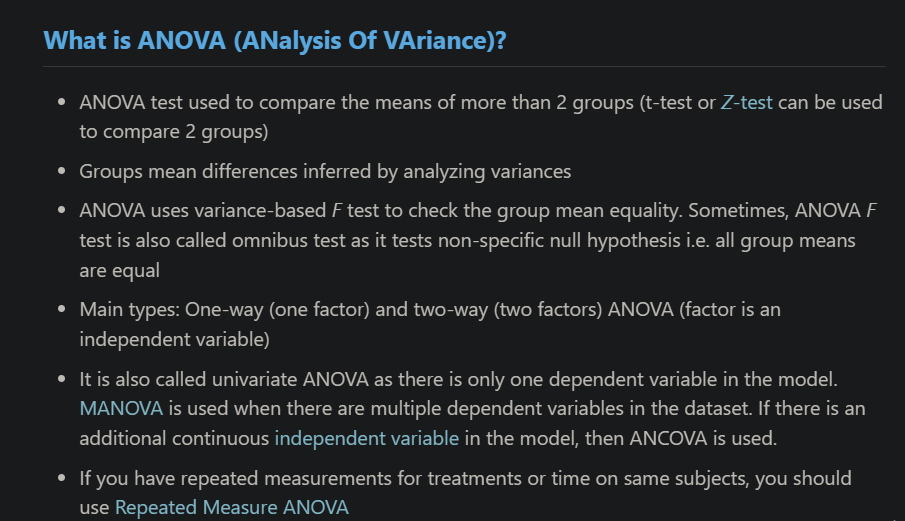

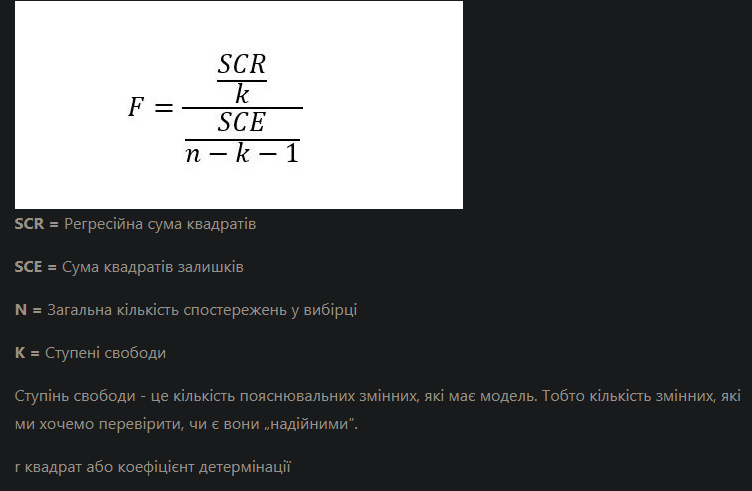

In [ ]:
print(stats.f_oneway(dictt['X1__clust_1']['min_max_norm_suicides_100k_pop'], dictt['X1__clust_1']['min_max_norm_suicides_no']))
print(stats.f_oneway(dictt['X2__clust_1']['min_max_norm_suicides_100k_pop'], dictt['X2__clust_1']['min_max_norm_suicides_no']))
print(stats.f_oneway(dictt['X3__clust_1']['min_max_norm_suicides_100k_pop'], dictt['X3__clust_1']['min_max_norm_suicides_no']))
print()
print(stats.f_oneway(dictt['X1__clust_2']['min_max_norm_suicides_100k_pop'], dictt['X1__clust_2']['min_max_norm_suicides_no']))
print(stats.f_oneway(dictt['X2__clust_2']['min_max_norm_suicides_100k_pop'], dictt['X2__clust_2']['min_max_norm_suicides_no']))
print(stats.f_oneway(dictt['X3__clust_2']['min_max_norm_suicides_100k_pop'], dictt['X3__clust_2']['min_max_norm_suicides_no']))
print()
print(stats.f_oneway(dictt['X1__clust_3']['min_max_norm_suicides_100k_pop'], dictt['X1__clust_3']['min_max_norm_suicides_no']))
print(stats.f_oneway(dictt['X2__clust_3']['min_max_norm_suicides_100k_pop'], dictt['X2__clust_3']['min_max_norm_suicides_no']))
print(stats.f_oneway(dictt['X3__clust_3']['min_max_norm_suicides_100k_pop'], dictt['X3__clust_3']['min_max_norm_suicides_no']))

F_onewayResult(statistic=5880.069915308971, pvalue=0.0)
F_onewayResult(statistic=6390.847840172407, pvalue=0.0)
F_onewayResult(statistic=5201.306896269258, pvalue=0.0)

F_onewayResult(statistic=2122.2579518840494, pvalue=0.0)
F_onewayResult(statistic=2043.0898652292258, pvalue=4.8725e-320)
F_onewayResult(statistic=2073.0993911760715, pvalue=2e-323)

F_onewayResult(statistic=2318.5649078437973, pvalue=1.9845823097139317e-183)
F_onewayResult(statistic=1799.6792680319606, pvalue=1.7699733634886797e-162)
F_onewayResult(statistic=2255.124039307113, pvalue=4.3560662042834254e-181)


In [ ]:
print(stats.f_oneway(dictt['X1__clust_1']['suicides_no'], dictt['X1__clust_1']['population']))
print(stats.f_oneway(dictt['X2__clust_1']['suicides_no'], dictt['X2__clust_1']['population']))
print(stats.f_oneway(dictt['X3__clust_1']['suicides_no'], dictt['X3__clust_1']['population']))
print()
print(stats.f_oneway(dictt['X1__clust_2']['suicides_no'], dictt['X1__clust_2']['population']))
print(stats.f_oneway(dictt['X2__clust_2']['suicides_no'], dictt['X2__clust_2']['population']))
print(stats.f_oneway(dictt['X3__clust_2']['suicides_no'], dictt['X3__clust_2']['population']))
print()
print(stats.f_oneway(dictt['X1__clust_3']['suicides_no'], dictt['X1__clust_3']['population']))
print(stats.f_oneway(dictt['X2__clust_3']['suicides_no'], dictt['X2__clust_3']['population']))
print(stats.f_oneway(dictt['X3__clust_3']['suicides_no'], dictt['X3__clust_3']['population']))

F_onewayResult(statistic=194.97599636805933, pvalue=4.054501024176617e-42)
F_onewayResult(statistic=196.8585694127844, pvalue=1.7295778545168463e-42)
F_onewayResult(statistic=164.24982177765523, pvalue=5.013702776409351e-36)

F_onewayResult(statistic=341.0729101067339, pvalue=3.90705177555502e-71)
F_onewayResult(statistic=410.3538770473853, pvalue=4.171993523269208e-84)
F_onewayResult(statistic=353.00494131434834, pvalue=2.1543421933494838e-73)

F_onewayResult(statistic=89.57863715038462, pvalue=1.4482091503647234e-19)
F_onewayResult(statistic=90.00850297534228, pvalue=1.2068778697308577e-19)
F_onewayResult(statistic=76.12422647194282, pvalue=4.7027169911266646e-17)


После перестановки

In [ ]:
print(stats.f_oneway(dictt2['X1__clust_1']['suicides_no'], dictt2['X1__clust_1']['population']))
print(stats.f_oneway(dictt2['X2__clust_1']['suicides_no'], dictt2['X2__clust_1']['population']))
print(stats.f_oneway(dictt2['X3__clust_1']['suicides_no'], dictt2['X3__clust_1']['population']))
print()
print(stats.f_oneway(dictt2['X1__clust_2']['suicides_no'], dictt2['X1__clust_2']['population']))
print(stats.f_oneway(dictt2['X2__clust_2']['suicides_no'], dictt2['X2__clust_2']['population']))
print(stats.f_oneway(dictt2['X3__clust_2']['suicides_no'], dictt2['X3__clust_2']['population']))
print()
print(stats.f_oneway(dictt2['X1__clust_3']['suicides_no'], dictt2['X1__clust_3']['population']))
print(stats.f_oneway(dictt2['X2__clust_3']['suicides_no'], dictt2['X2__clust_3']['population']))
print(stats.f_oneway(dictt2['X3__clust_3']['suicides_no'], dictt2['X3__clust_3']['population']))

F_onewayResult(statistic=177.70870870253566, pvalue=1.0449593375447545e-38)
F_onewayResult(statistic=194.6181721584429, pvalue=4.767662639678223e-42)
F_onewayResult(statistic=183.80845095816542, pvalue=6.463475405456237e-40)

F_onewayResult(statistic=385.66928543805454, pvalue=1.5959023338018135e-79)
F_onewayResult(statistic=337.77009408477164, pvalue=1.6552213546112103e-70)
F_onewayResult(statistic=380.15797310703584, pvalue=1.7061304352202098e-78)

F_onewayResult(statistic=82.43776676734562, pvalue=3.0590359972737643e-18)
F_onewayResult(statistic=77.95344516918892, pvalue=2.1231496340472322e-17)
F_onewayResult(statistic=95.15698174009255, pvalue=1.3755635265120686e-20)


### chi-square

In [ ]:
#stats.chisquare(f_obs=observed, f_exp=expected)


Критерий согласия Хи-квадрат используется, чтобы определить, следует ли категориальная переменная гипотетическому распределению.

Проверим гипотезу что для каждого кластера в общем ожидается среднее количество самоубийств.

In [ ]:
print(chisquare(f_obs = dictt['X1__clust_1']['suicides_100k_pop'], f_exp = dictt['X1__clust_1']['suicides_100k_pop'].mean()))
print(chisquare(f_obs = dictt['X2__clust_1']['suicides_100k_pop'], f_exp = dictt['X2__clust_1']['suicides_100k_pop'].mean()))
print(chisquare(f_obs = dictt['X3__clust_1']['suicides_100k_pop'], f_exp = dictt['X3__clust_1']['suicides_100k_pop'].mean()))
print()
print(chisquare(f_obs = dictt['X1__clust_2']['suicides_100k_pop'], f_exp = dictt['X1__clust_2']['suicides_100k_pop'].mean()))
print(chisquare(f_obs = dictt['X2__clust_2']['suicides_100k_pop'], f_exp = dictt['X2__clust_2']['suicides_100k_pop'].mean()))
print(chisquare(f_obs = dictt['X3__clust_2']['suicides_100k_pop'], f_exp = dictt['X3__clust_2']['suicides_100k_pop'].mean()))
print()
print(chisquare(f_obs = dictt['X1__clust_3']['suicides_100k_pop'], f_exp = dictt['X1__clust_3']['suicides_100k_pop'].mean()))
print(chisquare(f_obs = dictt['X2__clust_3']['suicides_100k_pop'], f_exp = dictt['X2__clust_3']['suicides_100k_pop'].mean()))
print(chisquare(f_obs = dictt['X3__clust_3']['suicides_100k_pop'], f_exp = dictt['X3__clust_3']['suicides_100k_pop'].mean()))

Power_divergenceResult(statistic=1460.0763814254642, pvalue=1.0418095241634385e-30)
Power_divergenceResult(statistic=1423.5732240946131, pvalue=1.2470780081443278e-27)
Power_divergenceResult(statistic=1374.4568916177873, pvalue=1.0953989364771128e-23)

Power_divergenceResult(statistic=4160.801154488969, pvalue=0.0)
Power_divergenceResult(statistic=4321.581300185093, pvalue=0.0)
Power_divergenceResult(statistic=4286.0530223305295, pvalue=0.0)

Power_divergenceResult(statistic=493.9859244886445, pvalue=1.0610183916672826e-20)
Power_divergenceResult(statistic=534.6756746660118, pvalue=1.4126428371575385e-25)
Power_divergenceResult(statistic=495.80052476916205, pvalue=6.531901420454371e-21)


Поскольку p-значение везде меньше 0,05, мы можем отвергнуть нулевую гипотезу. 

Это означает, что у нас есть достаточно доказательств того, что истинное распределение числа самоубийств отличается от распределения, о котором предполагалось